Importing necessary libraries

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# for managing file systems  
import os

os.getcwd() show the location

In [71]:
print(os.path)
print(os.listdir())
BASE_DIR = os.getcwd()
print(BASE_DIR)

BASE_DIR = os.path.dirname(os.path.abspath(BASE_DIR))
print(BASE_DIR)
DATA_DIR = os.path.join(BASE_DIR, "", "data")
Data_Row = os.path.join(DATA_DIR, "", "raw")

file_path = os.path.join(Data_Row, "WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(file_path)


<module 'ntpath' from 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\\lib\\ntpath.py'>
['01-eda.ipynb']
d:\python workspace\K1-case-studies\ML\classification\telco-customer-churn\notebooks
d:\python workspace\K1-case-studies\ML\classification\telco-customer-churn
d:\python workspace\K1-case-studies\ML\classification\telco-customer-churn\data\raw\WA_Fn-UseC_-Telco-Customer-Churn.csv


Read in the data

In [72]:
data = pd.read_csv(file_path)
print('Training data shape: ', data.shape)
data.head()


Training data shape:  (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


General Description

Number of rows and columns
Data types of each column

In [73]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


list all columns by name 

In [74]:
print(data.columns)
data.columns.tolist()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

1) Exploratory Data Analysis (EDA)

Target Variable Distribution
numbers of churn vs. non-churn
Percentage of churn vs. non-churn

In [97]:

print(data['Churn'].value_counts())
percentage_Churn = data['Churn'].value_counts(normalize=True) * 100 
    
    

Churn
No     5174
Yes    1869
Name: count, dtype: int64


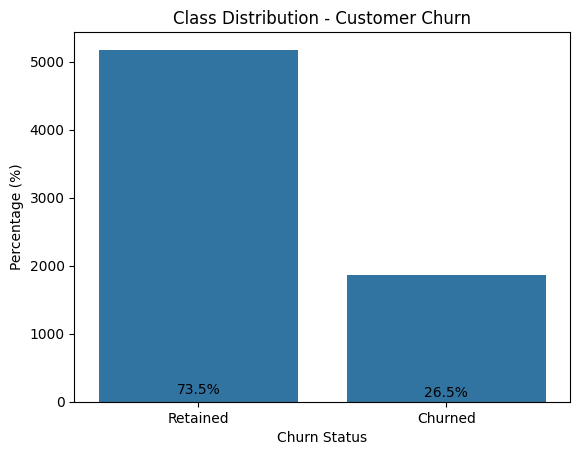

In [98]:
sns.countplot(x= 'Churn', data = data)
plt.title('Class Distribution - Customer Churn')
plt.xlabel('Churn Status')
plt.ylabel('Percentage (%)')
plt.xticks([0, 1], ['Retained', 'Churned'], rotation=0)
for i, v in enumerate(percentage_Churn.values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom')
plt.savefig('../figures/01_churn_distribution.png', dpi=300, bbox_inches='tight')

### 📊 Class Imbalance Challenge

One of the key challenges in this dataset is **class imbalance**:
- **Churn Rate:** ~27% of customers have churned
- **Retention Rate:** ~73% of customers are retained

This imbalance can lead to:
- Model bias towards the majority class
- Poor performance on minority class (churned customers)
- Need for specialized techniques like SMOTE, class weighting, or threshold tuning

In [99]:
def explore_feature_vs_target(data: pd.DataFrame,feature: str, target='Churn', save_path=None):
    print(f"Examining {feature} vs {target}")
    print("="*50)
    print(f"Examining the Distribution of {feature}")
    print(data[feature].value_counts())
    print(f"Percentage {feature}")
    print(data[feature].value_counts(normalize=True) * 100)

    # Cross-tabulation
    print(f"\n{feature} vs {target} Cross-tab:")
    crosstab = pd.crosstab(data[feature], data[target])
    print(crosstab)

    fig, axes = plt.subplots(1,2, figsize=(50, 20))

    sns.countplot(x=feature, data=data,ax= axes[0])
    axes[0].set_title(f'{feature} Distribution')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Target vs feature
    sns.countplot(x=target, hue=feature, data=data,ax= axes[1])
    axes[1].set_title(f'{target} vs {feature}')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()

Examining gender vs Churn
Examining the Distribution of gender
gender
Male      3555
Female    3488
Name: count, dtype: int64
Percentage gender
gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64

gender vs Churn Cross-tab:
Churn     No  Yes
gender           
Female  2549  939
Male    2625  930


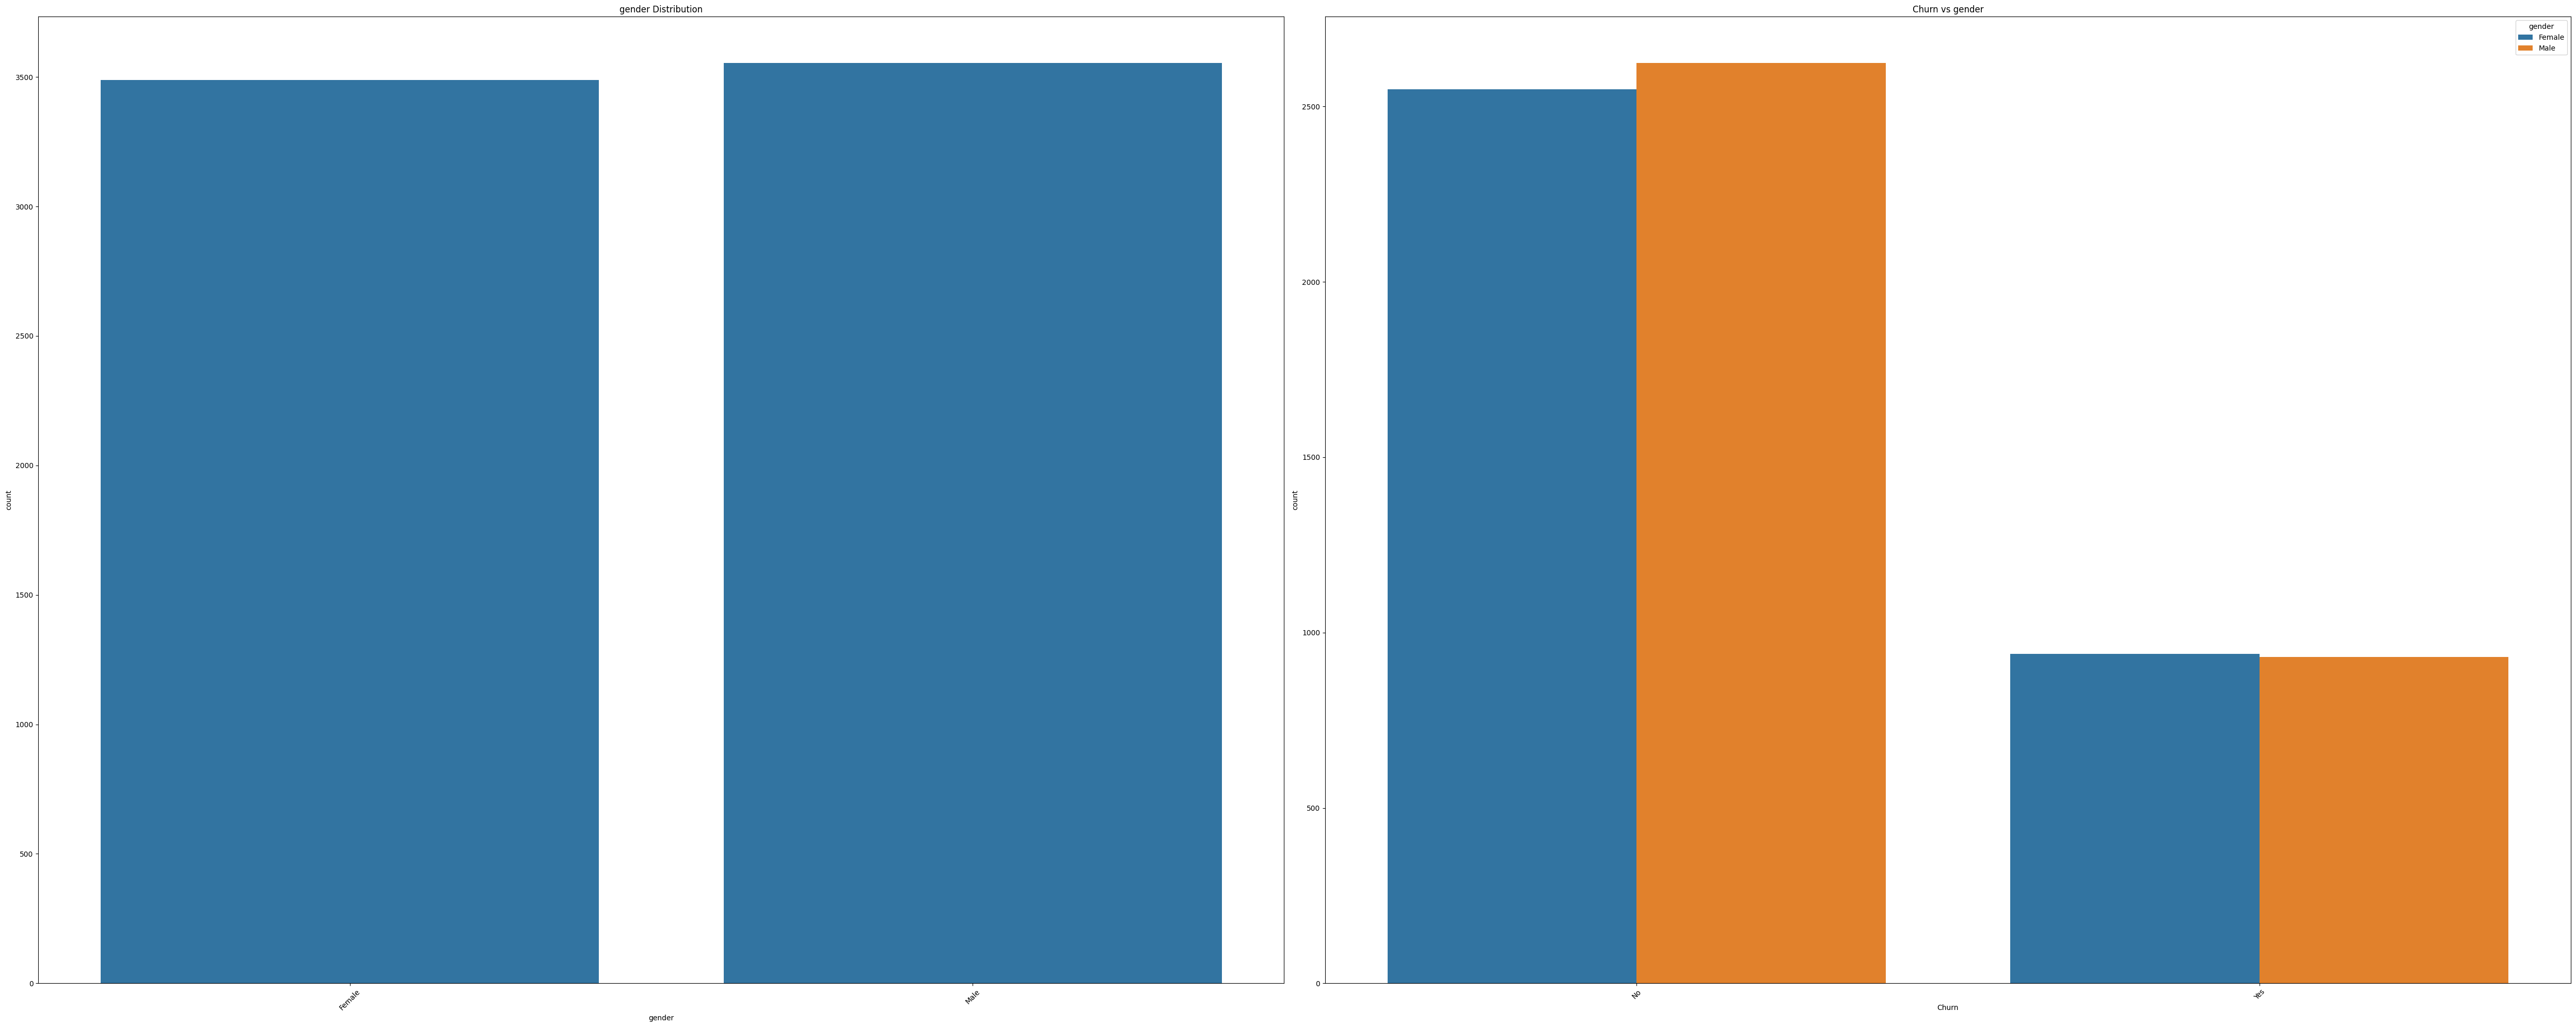

In [100]:
explore_feature_vs_target(data= data,feature='gender')

Examining SeniorCitizen vs Churn
Examining the Distribution of SeniorCitizen
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Percentage SeniorCitizen
SeniorCitizen
0    83.785319
1    16.214681
Name: proportion, dtype: float64

SeniorCitizen vs Churn Cross-tab:
Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476


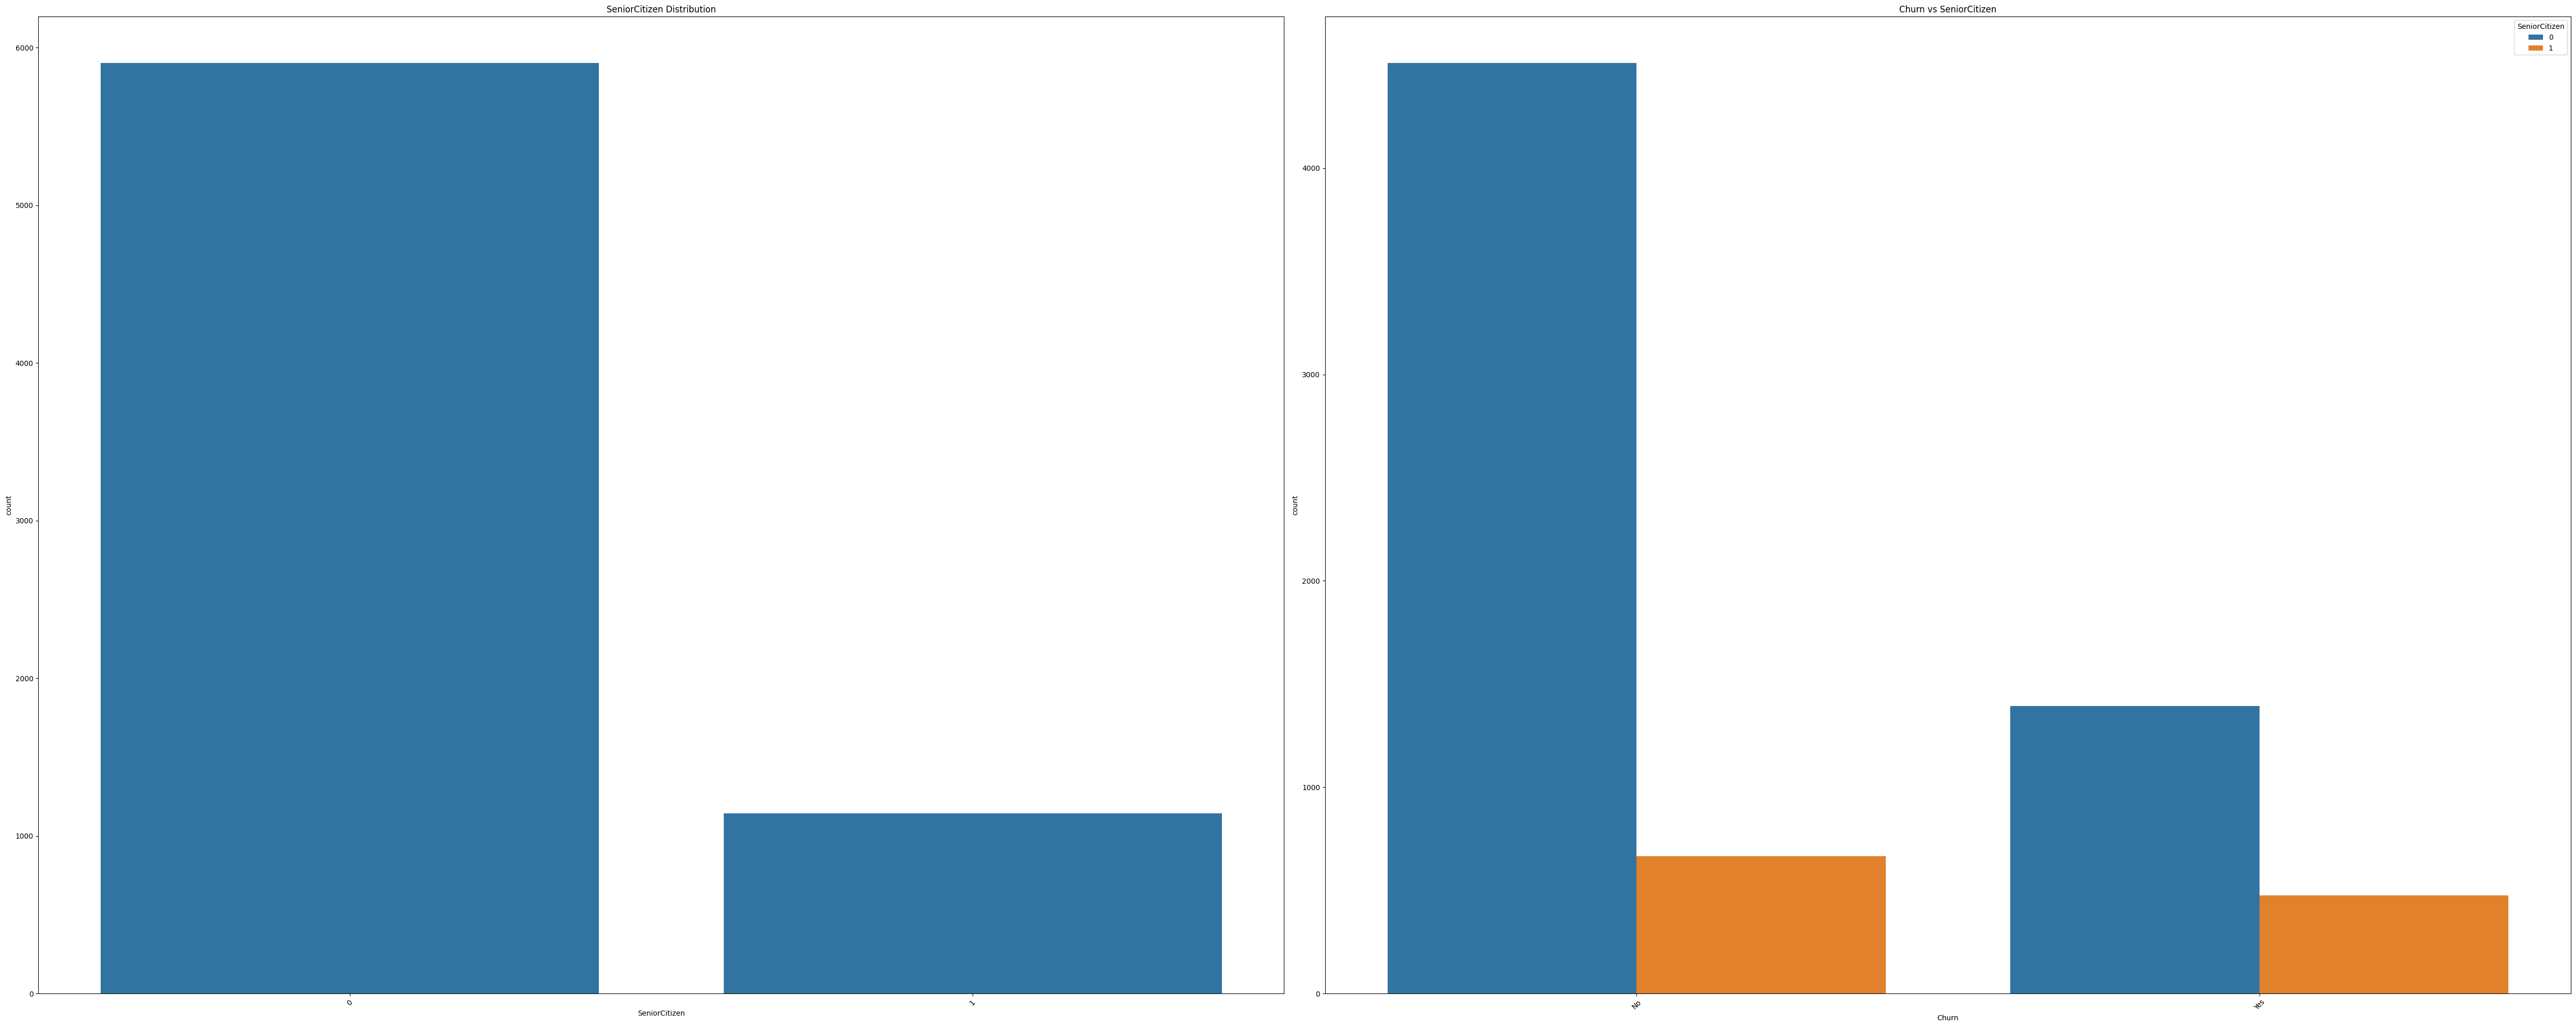

In [101]:
explore_feature_vs_target(data= data,feature='SeniorCitizen')

Examining Partner vs Churn
Examining the Distribution of Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Percentage Partner
Partner
No     51.69672
Yes    48.30328
Name: proportion, dtype: float64

Partner vs Churn Cross-tab:
Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669


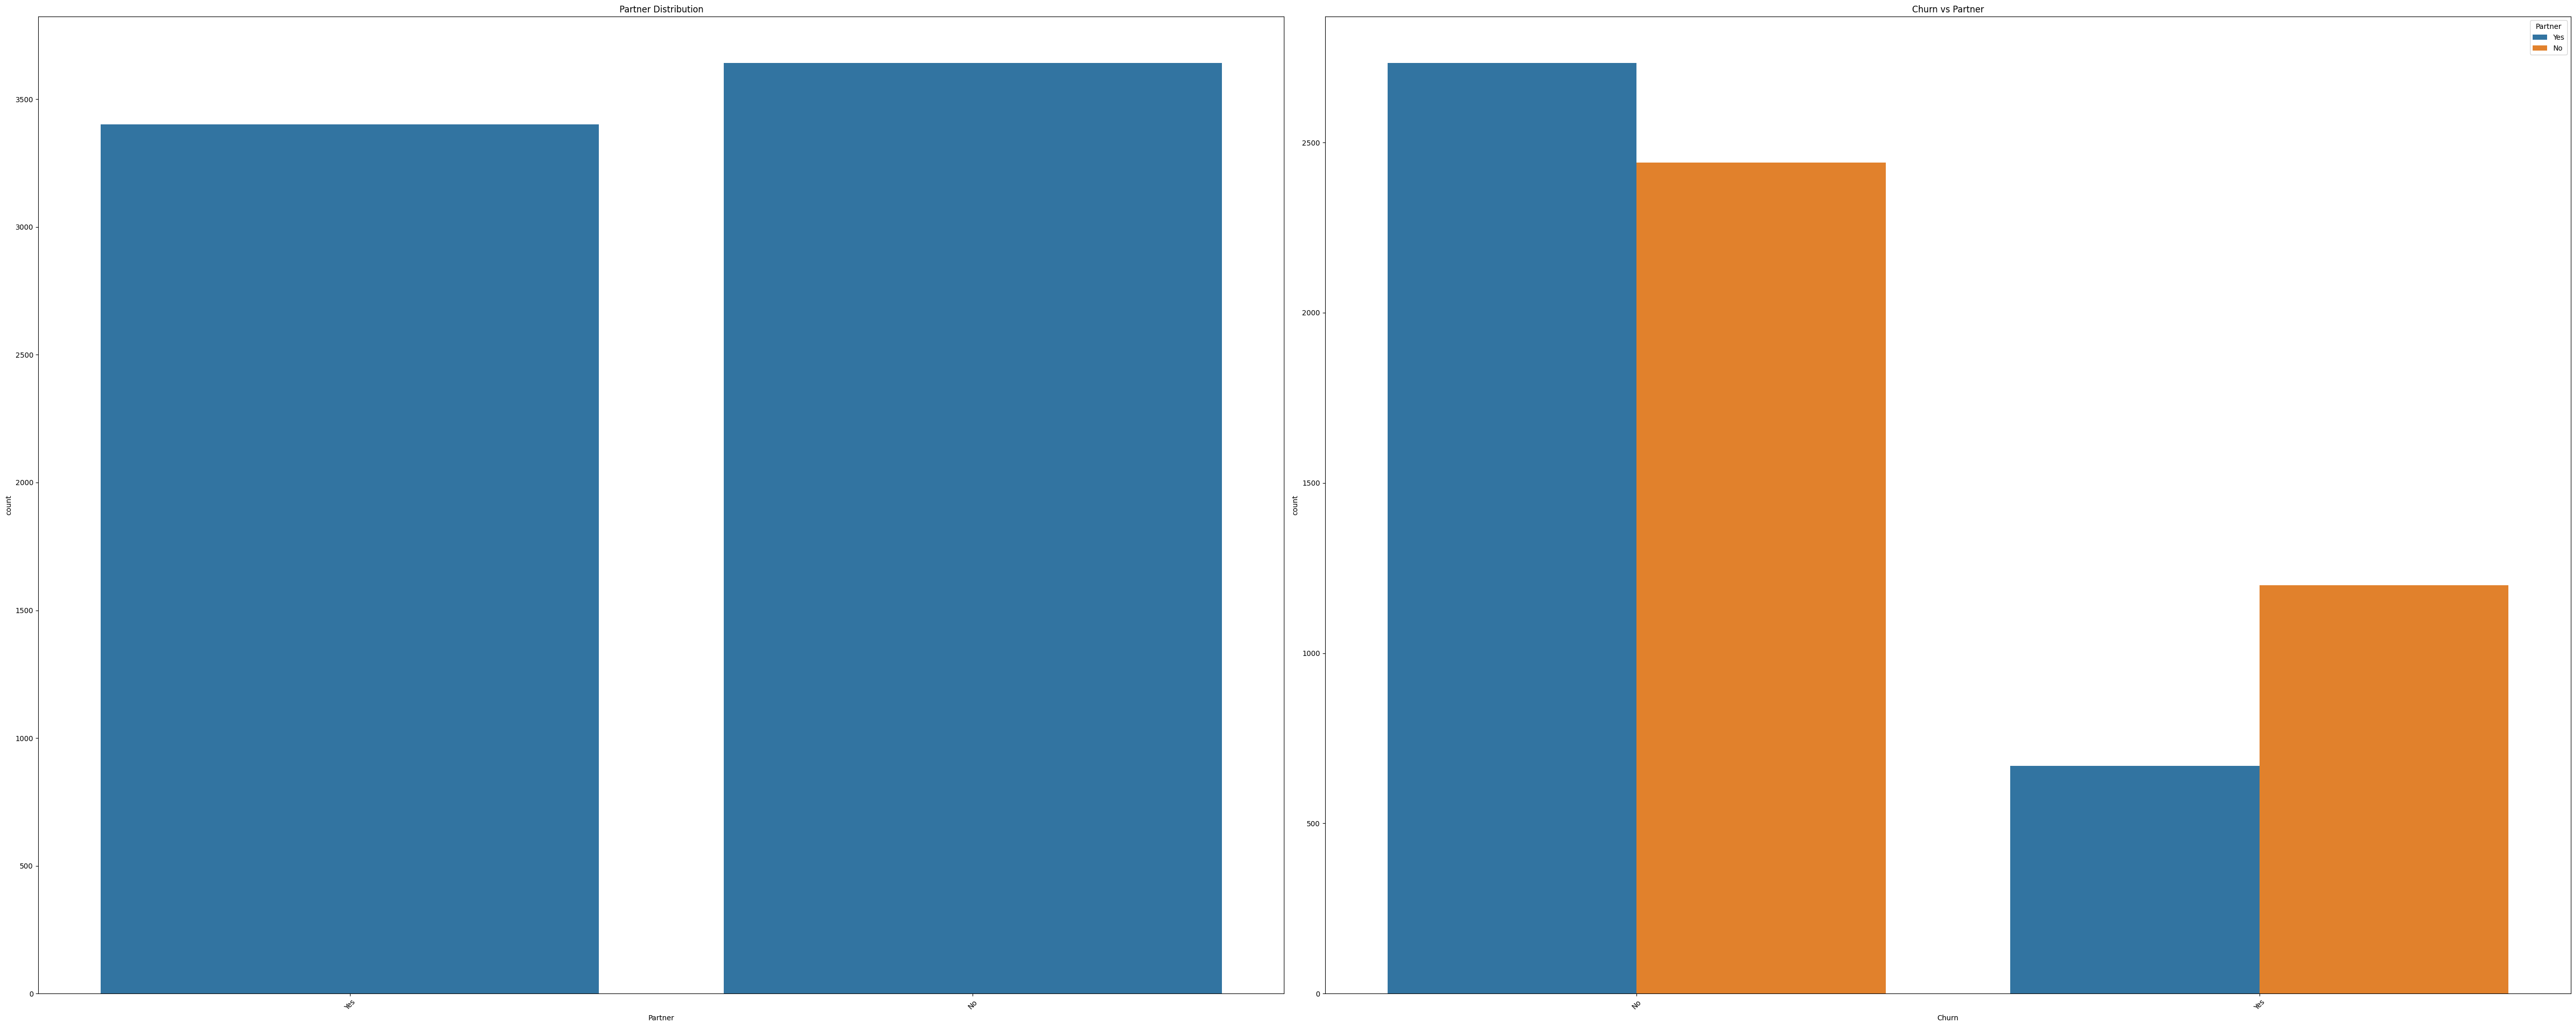

In [102]:
explore_feature_vs_target(data= data,feature='Partner')

Examining Dependents vs Churn
Examining the Distribution of Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
Percentage Dependents
Dependents
No     70.041176
Yes    29.958824
Name: proportion, dtype: float64

Dependents vs Churn Cross-tab:
Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326


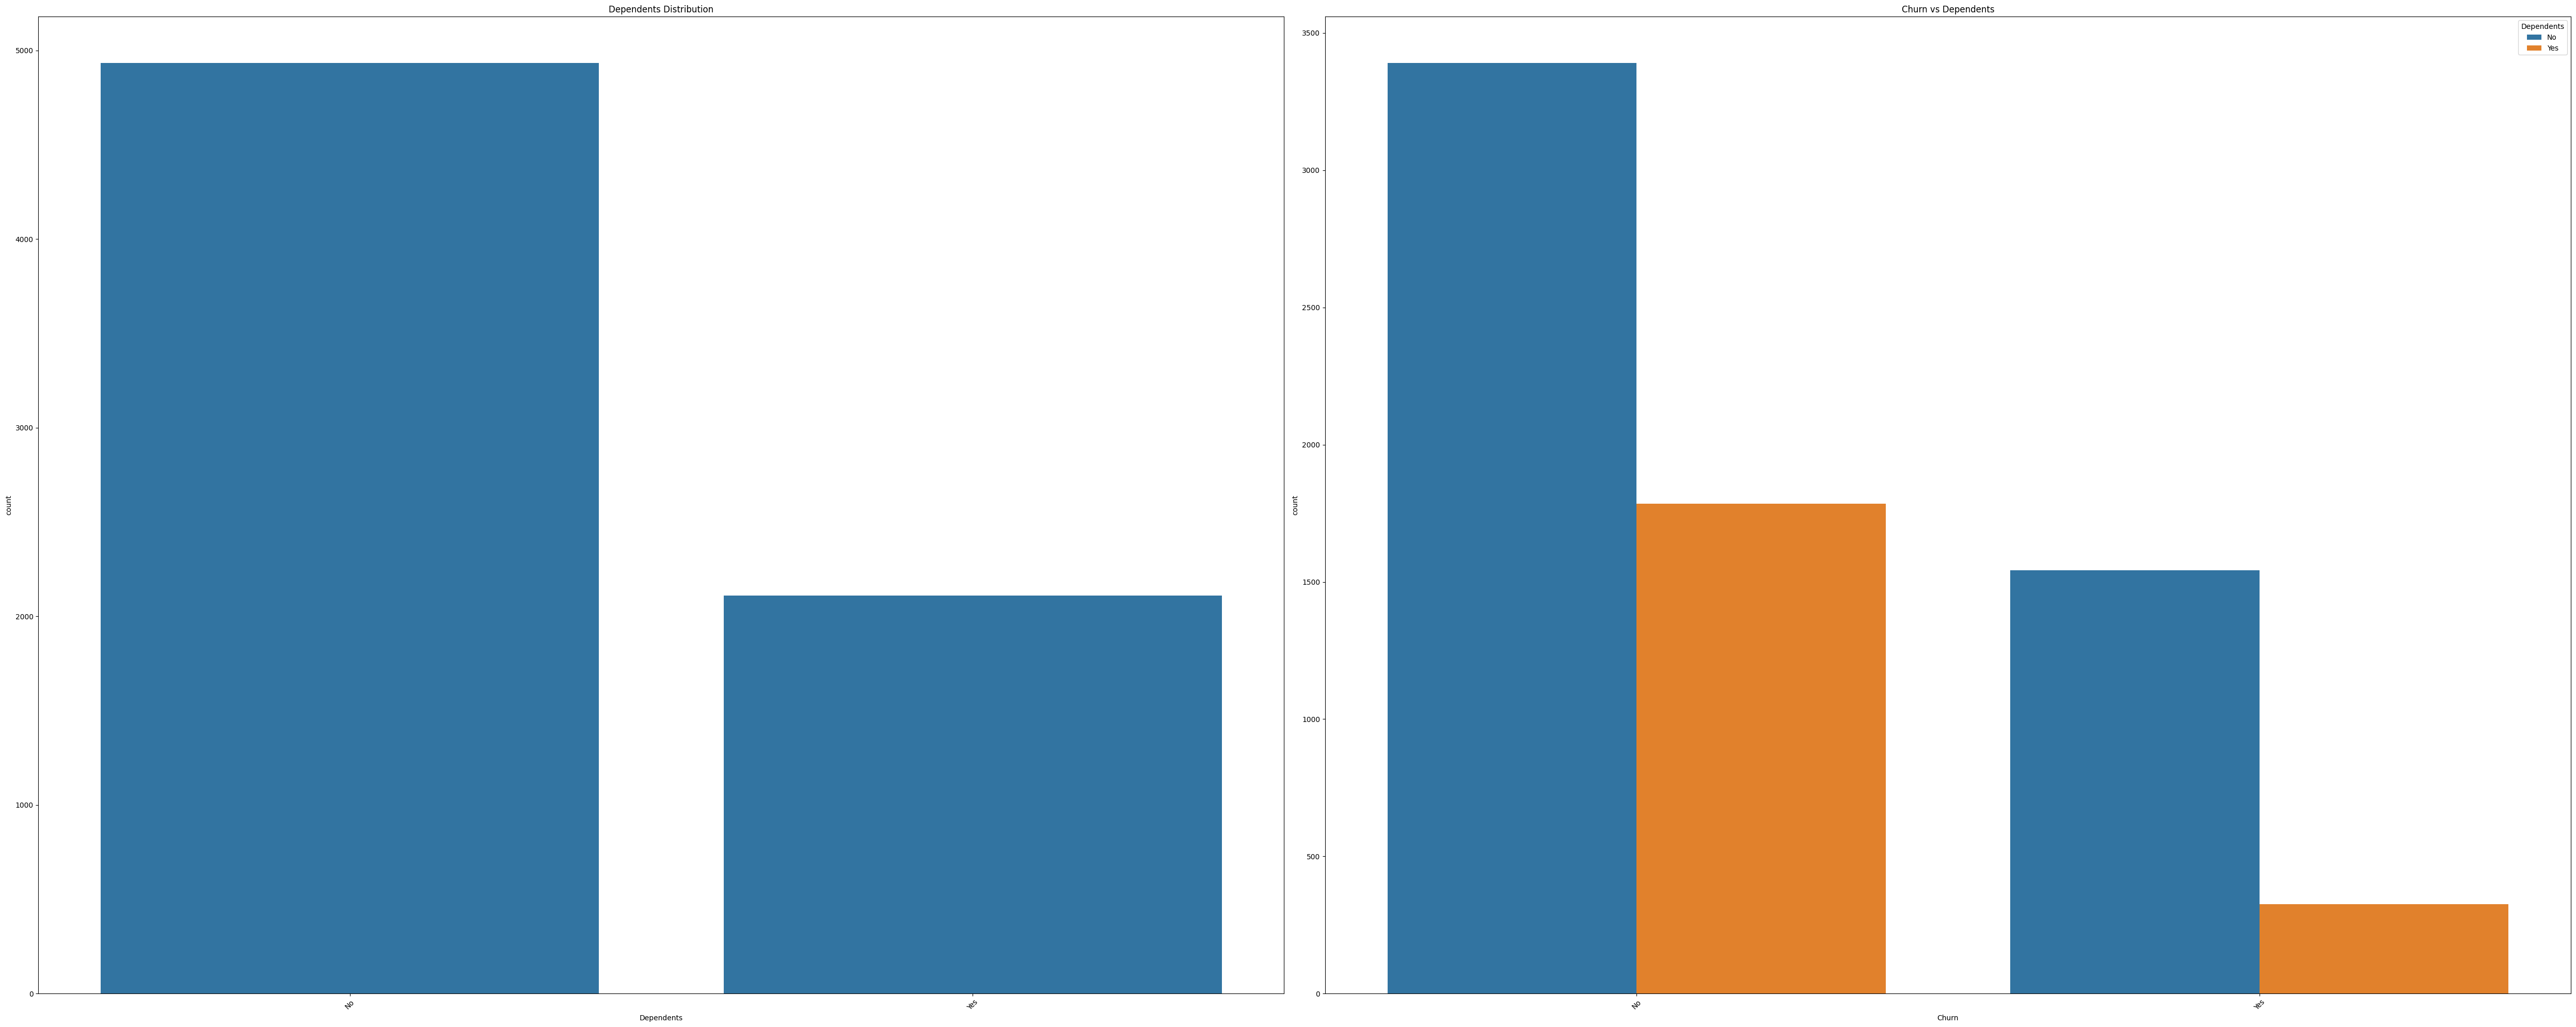

In [103]:
explore_feature_vs_target(data= data,feature='Dependents')

Examining MultipleLines vs Churn
Examining the Distribution of MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
Percentage MultipleLines
MultipleLines
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: proportion, dtype: float64

MultipleLines vs Churn Cross-tab:
Churn               No  Yes
MultipleLines              
No                2541  849
No phone service   512  170
Yes               2121  850


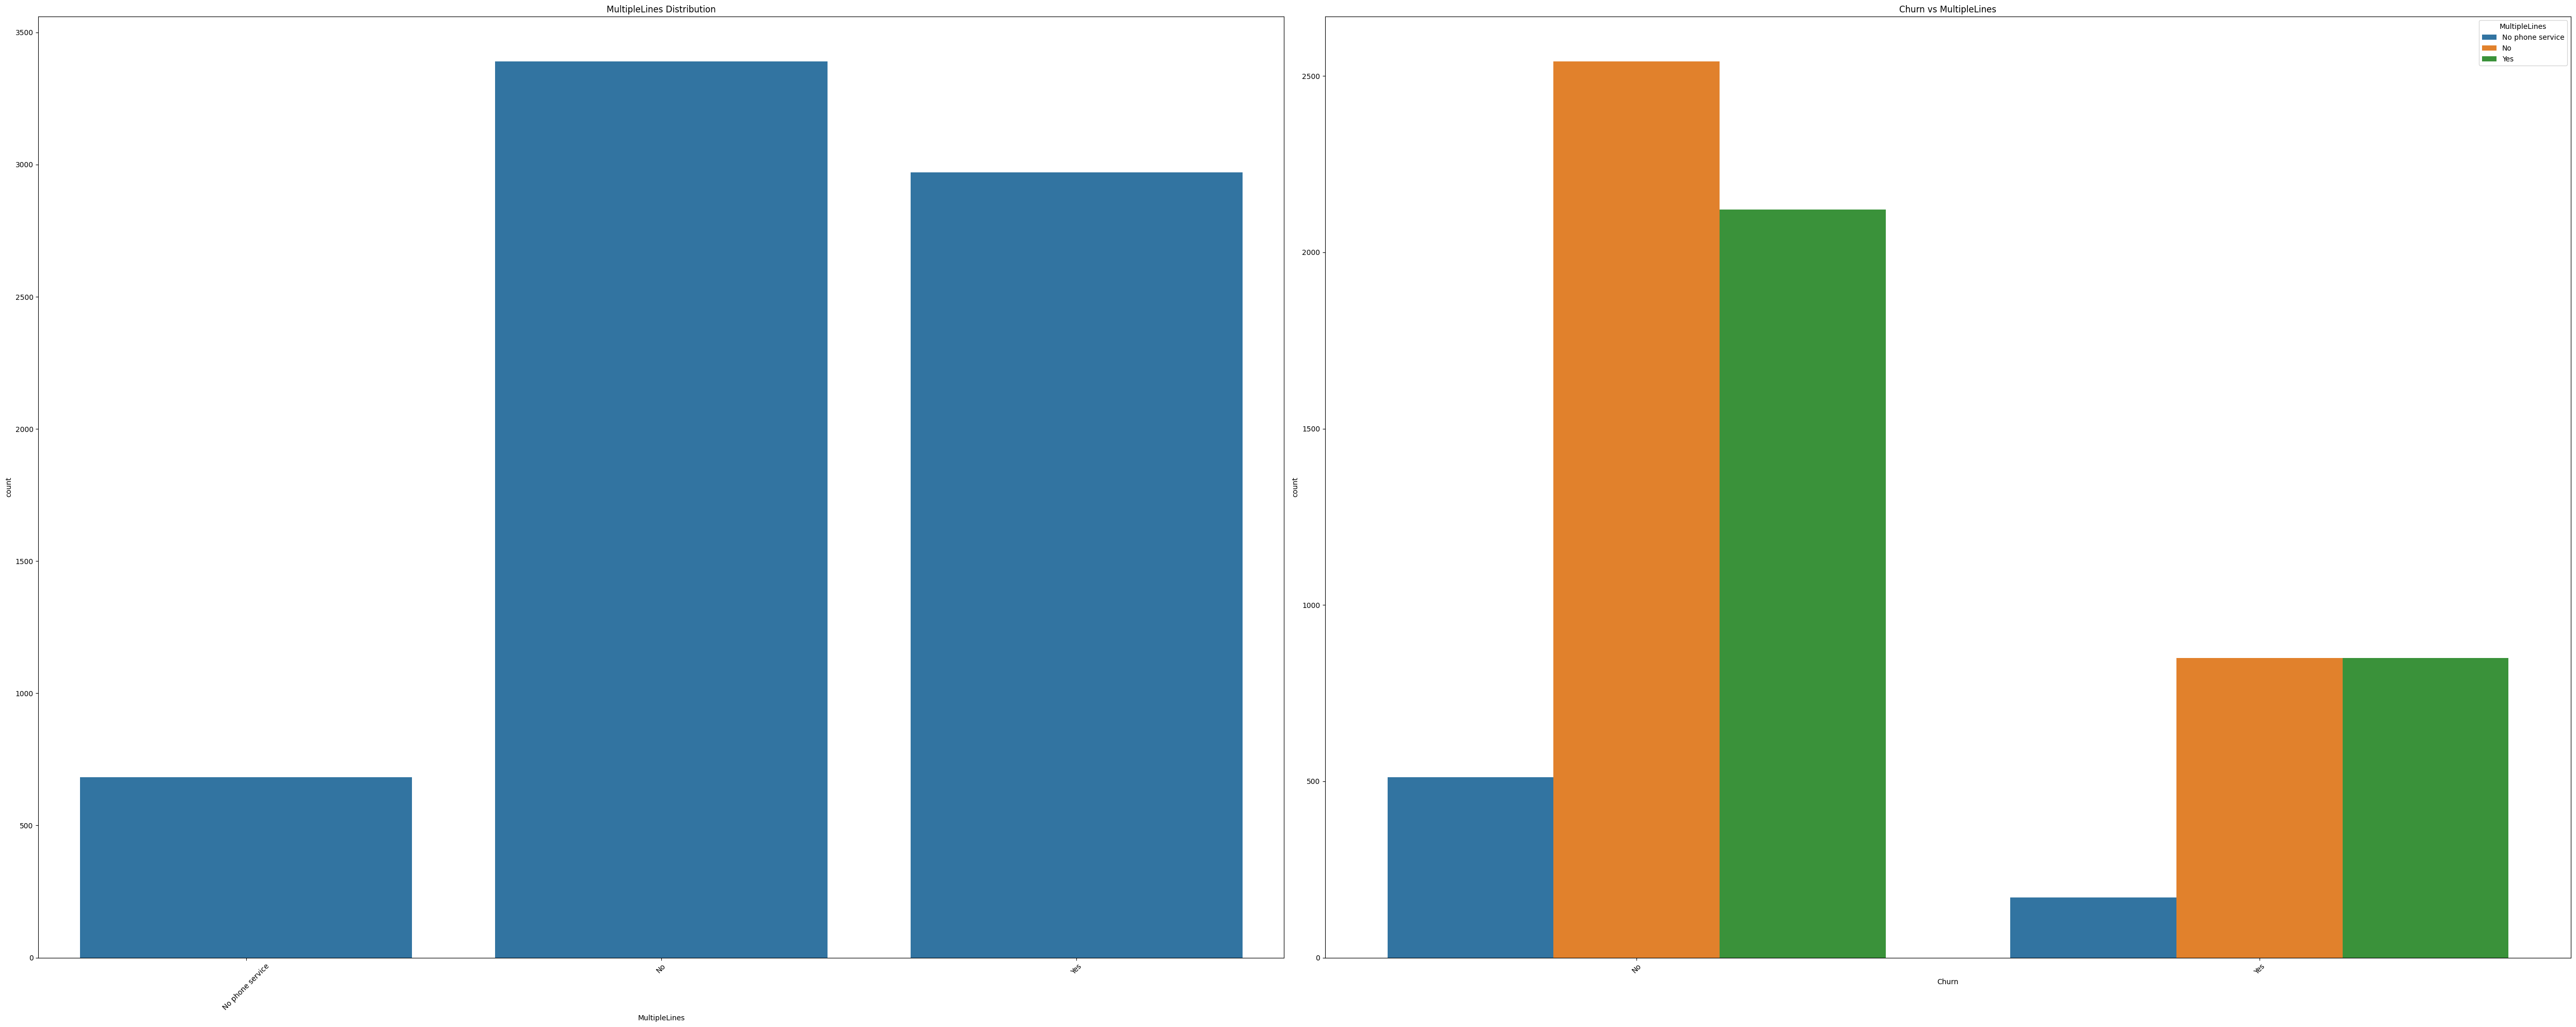

In [104]:
explore_feature_vs_target(data= data,feature='MultipleLines')

Examining PhoneService vs Churn
Examining the Distribution of PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
Percentage PhoneService
PhoneService
Yes    90.316626
No      9.683374
Name: proportion, dtype: float64

PhoneService vs Churn Cross-tab:
Churn           No   Yes
PhoneService            
No             512   170
Yes           4662  1699


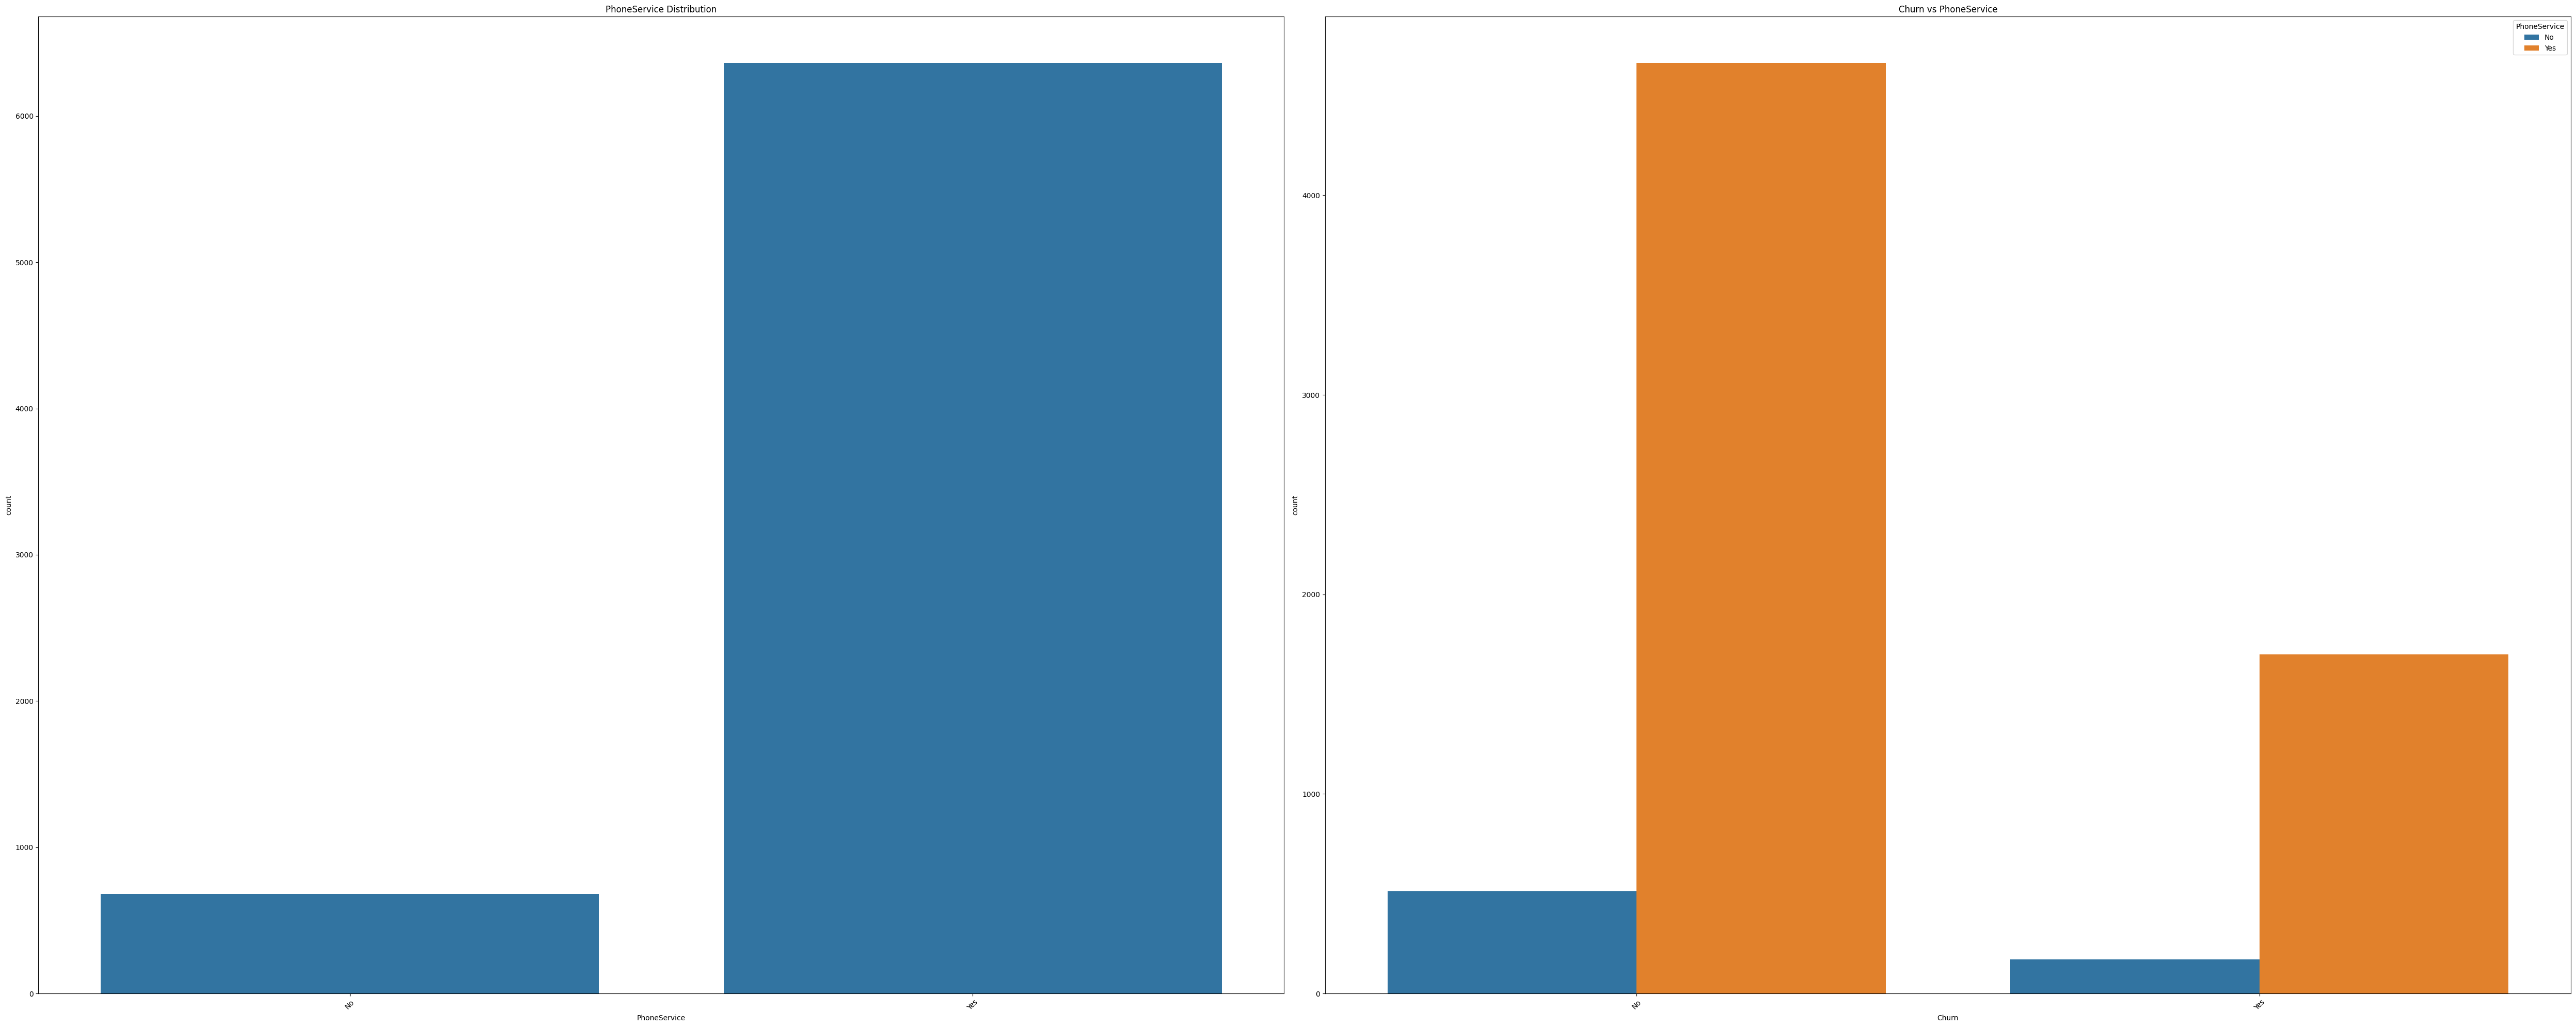

In [105]:
explore_feature_vs_target(data= data,feature='PhoneService')

Examining InternetService vs Churn
Examining the Distribution of InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
Percentage InternetService
InternetService
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: proportion, dtype: float64

InternetService vs Churn Cross-tab:
Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113


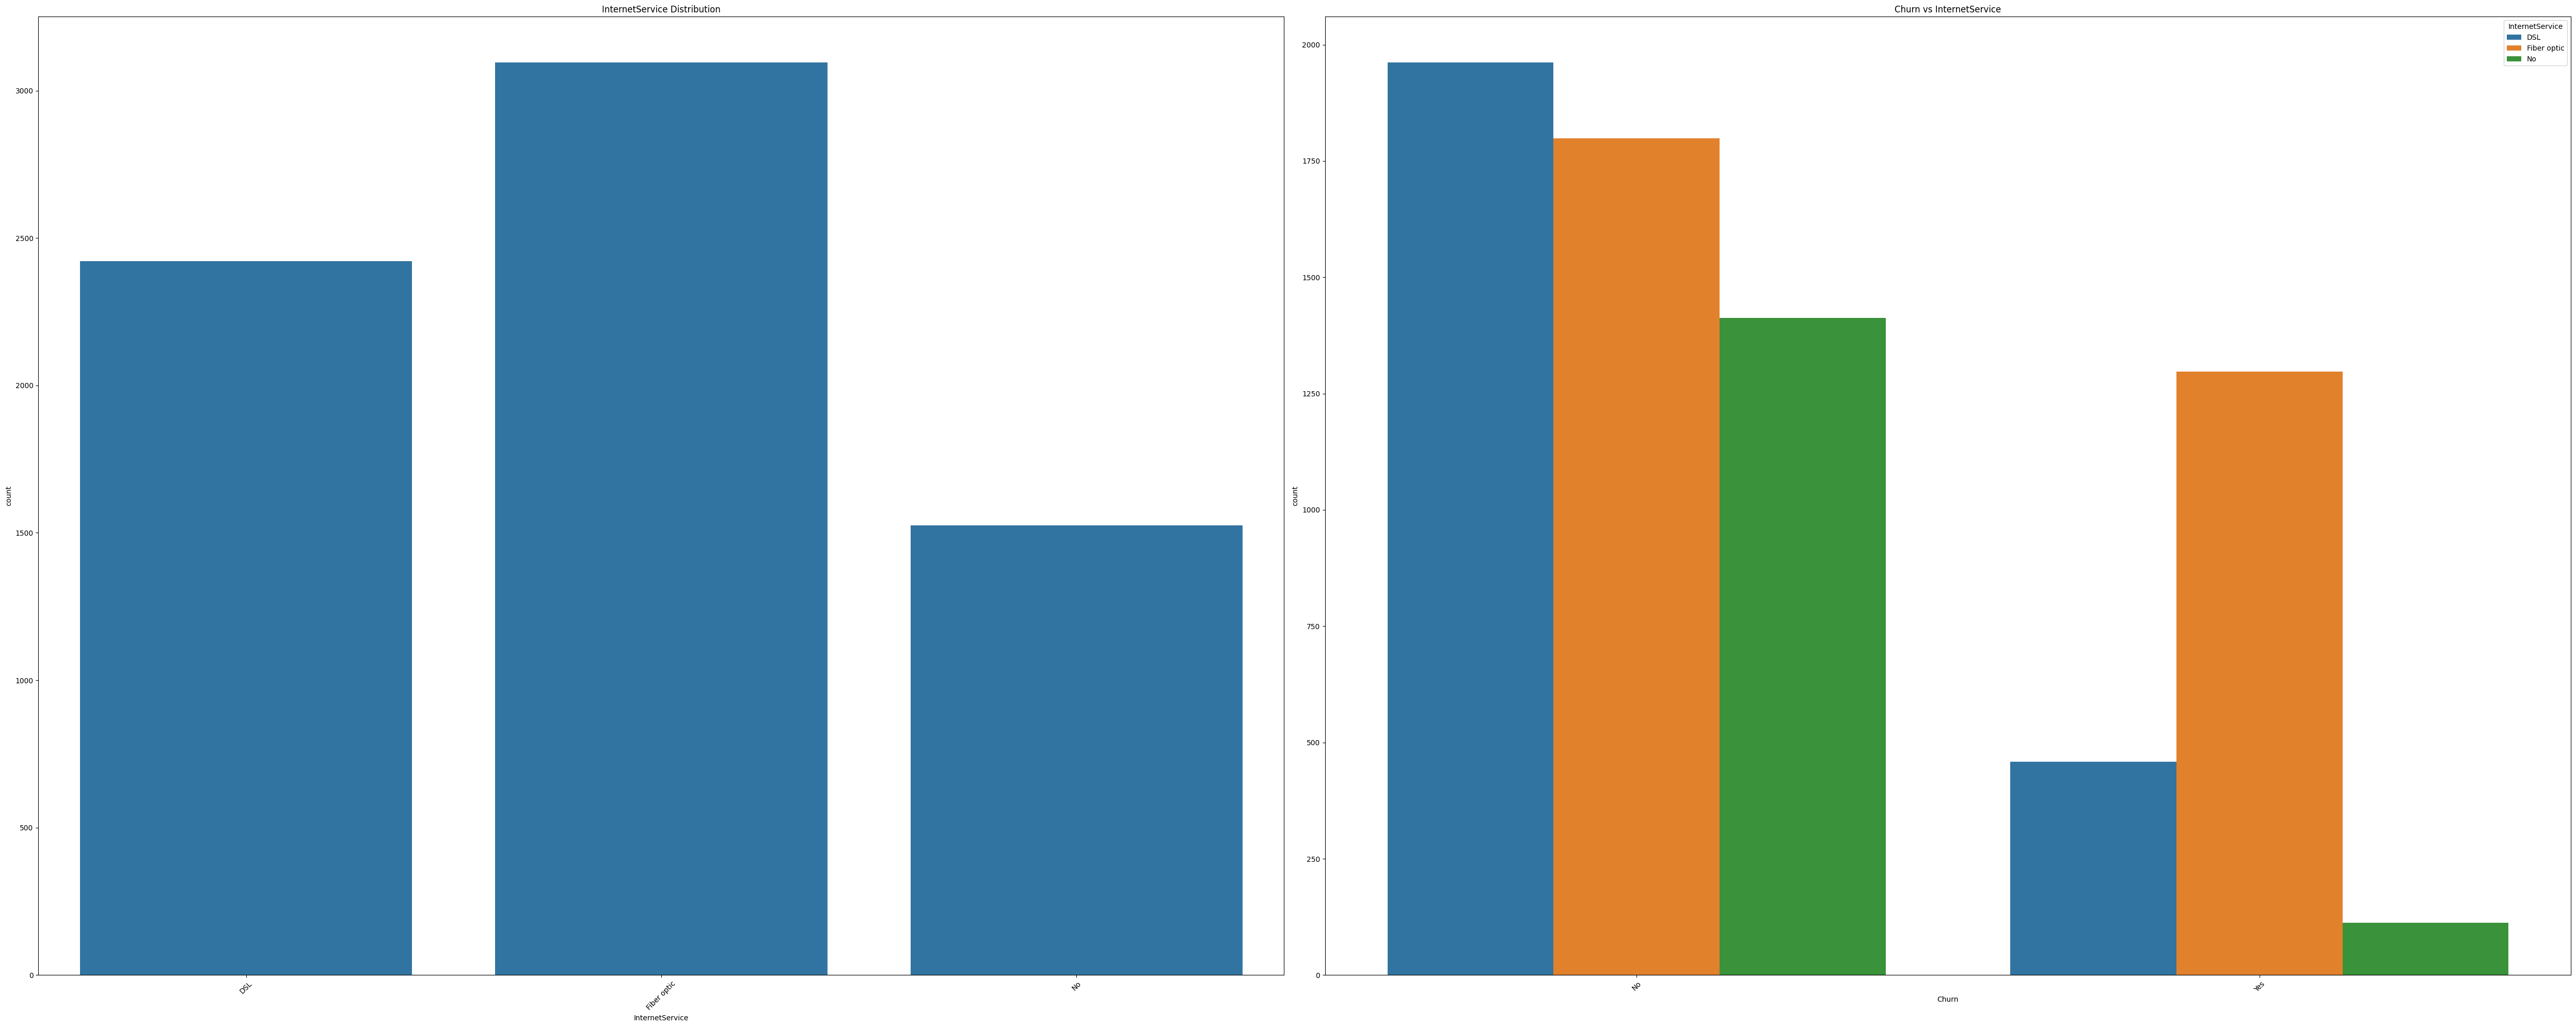

In [106]:
explore_feature_vs_target(data= data,feature='InternetService')

Examining OnlineSecurity vs Churn
Examining the Distribution of OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
Percentage OnlineSecurity
OnlineSecurity
No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: proportion, dtype: float64

OnlineSecurity vs Churn Cross-tab:
Churn                  No   Yes
OnlineSecurity                 
No                   2037  1461
No internet service  1413   113
Yes                  1724   295


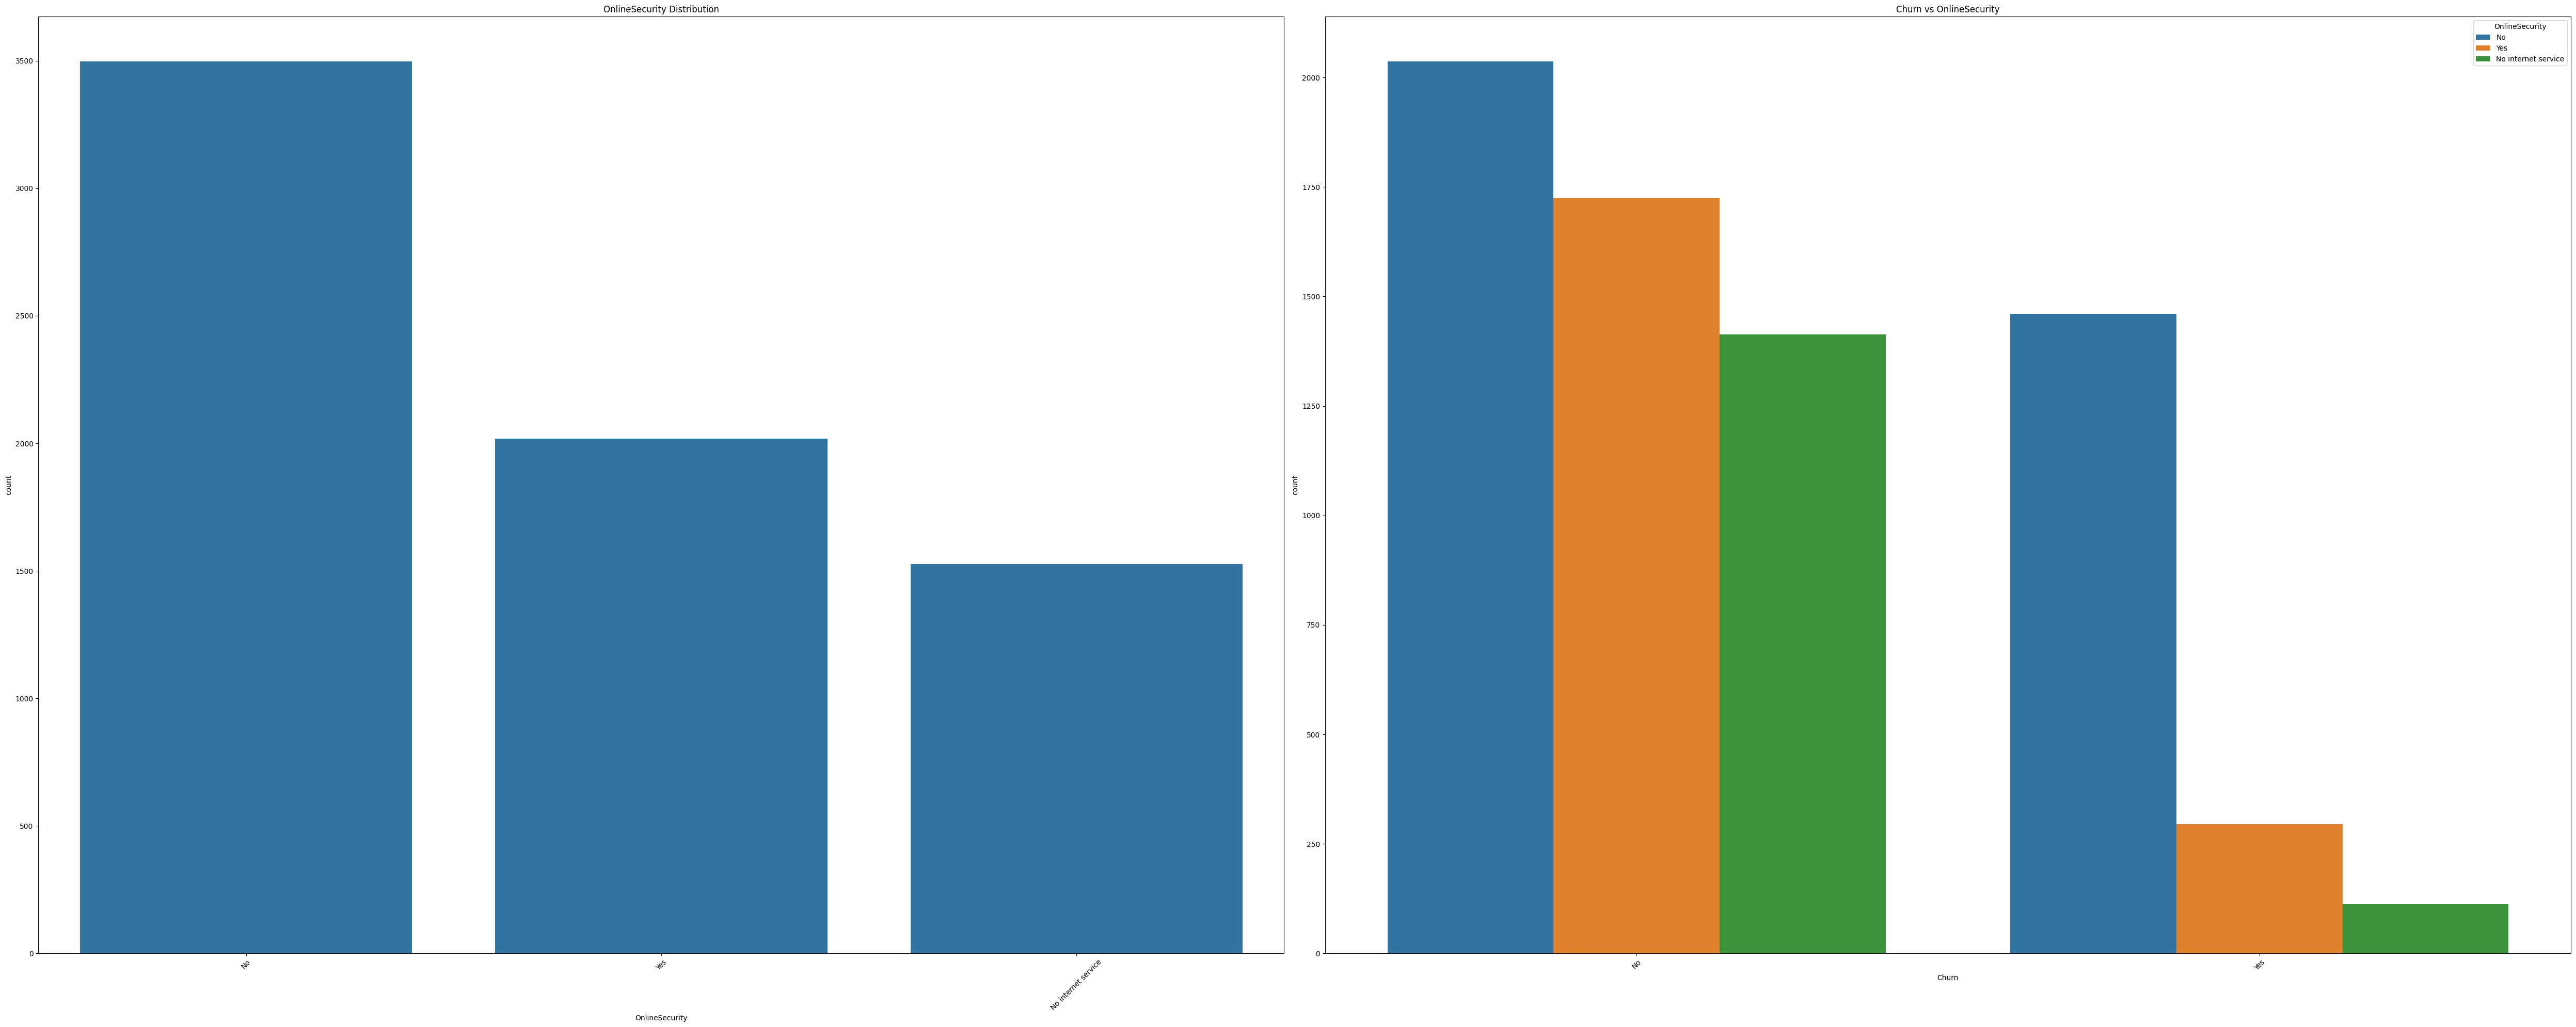

In [107]:
explore_feature_vs_target(data= data,feature='OnlineSecurity')

Examining OnlineBackup vs Churn
Examining the Distribution of OnlineBackup
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
Percentage OnlineBackup
OnlineBackup
No                     43.844952
Yes                    34.488144
No internet service    21.666903
Name: proportion, dtype: float64

OnlineBackup vs Churn Cross-tab:
Churn                  No   Yes
OnlineBackup                   
No                   1855  1233
No internet service  1413   113
Yes                  1906   523


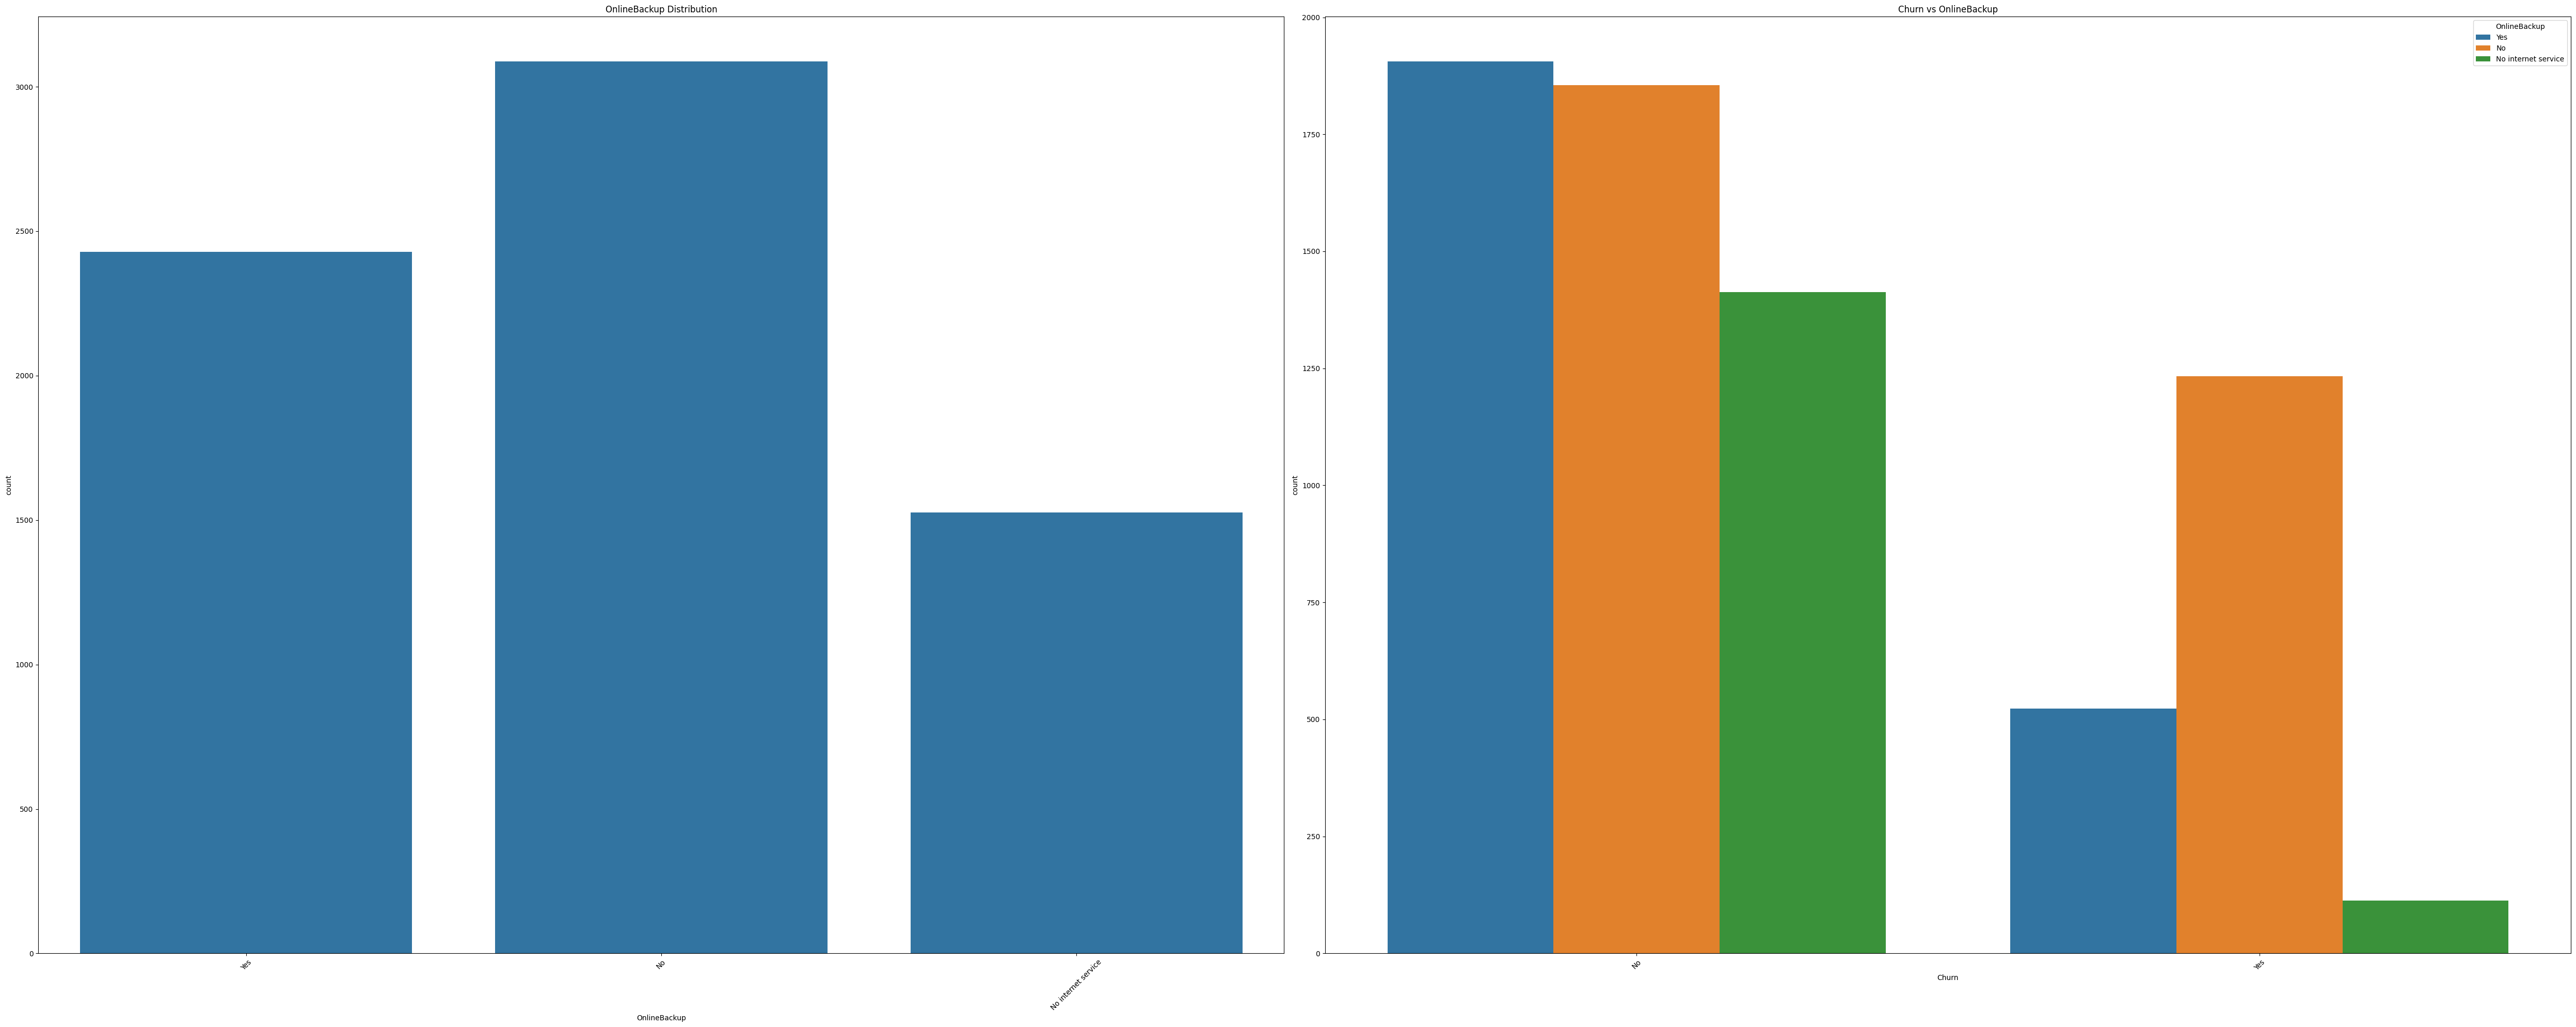

In [108]:
explore_feature_vs_target(data= data,feature='OnlineBackup')

Examining DeviceProtection vs Churn
Examining the Distribution of DeviceProtection
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
Percentage DeviceProtection
DeviceProtection
No                     43.944342
Yes                    34.388755
No internet service    21.666903
Name: proportion, dtype: float64

DeviceProtection vs Churn Cross-tab:
Churn                  No   Yes
DeviceProtection               
No                   1884  1211
No internet service  1413   113
Yes                  1877   545


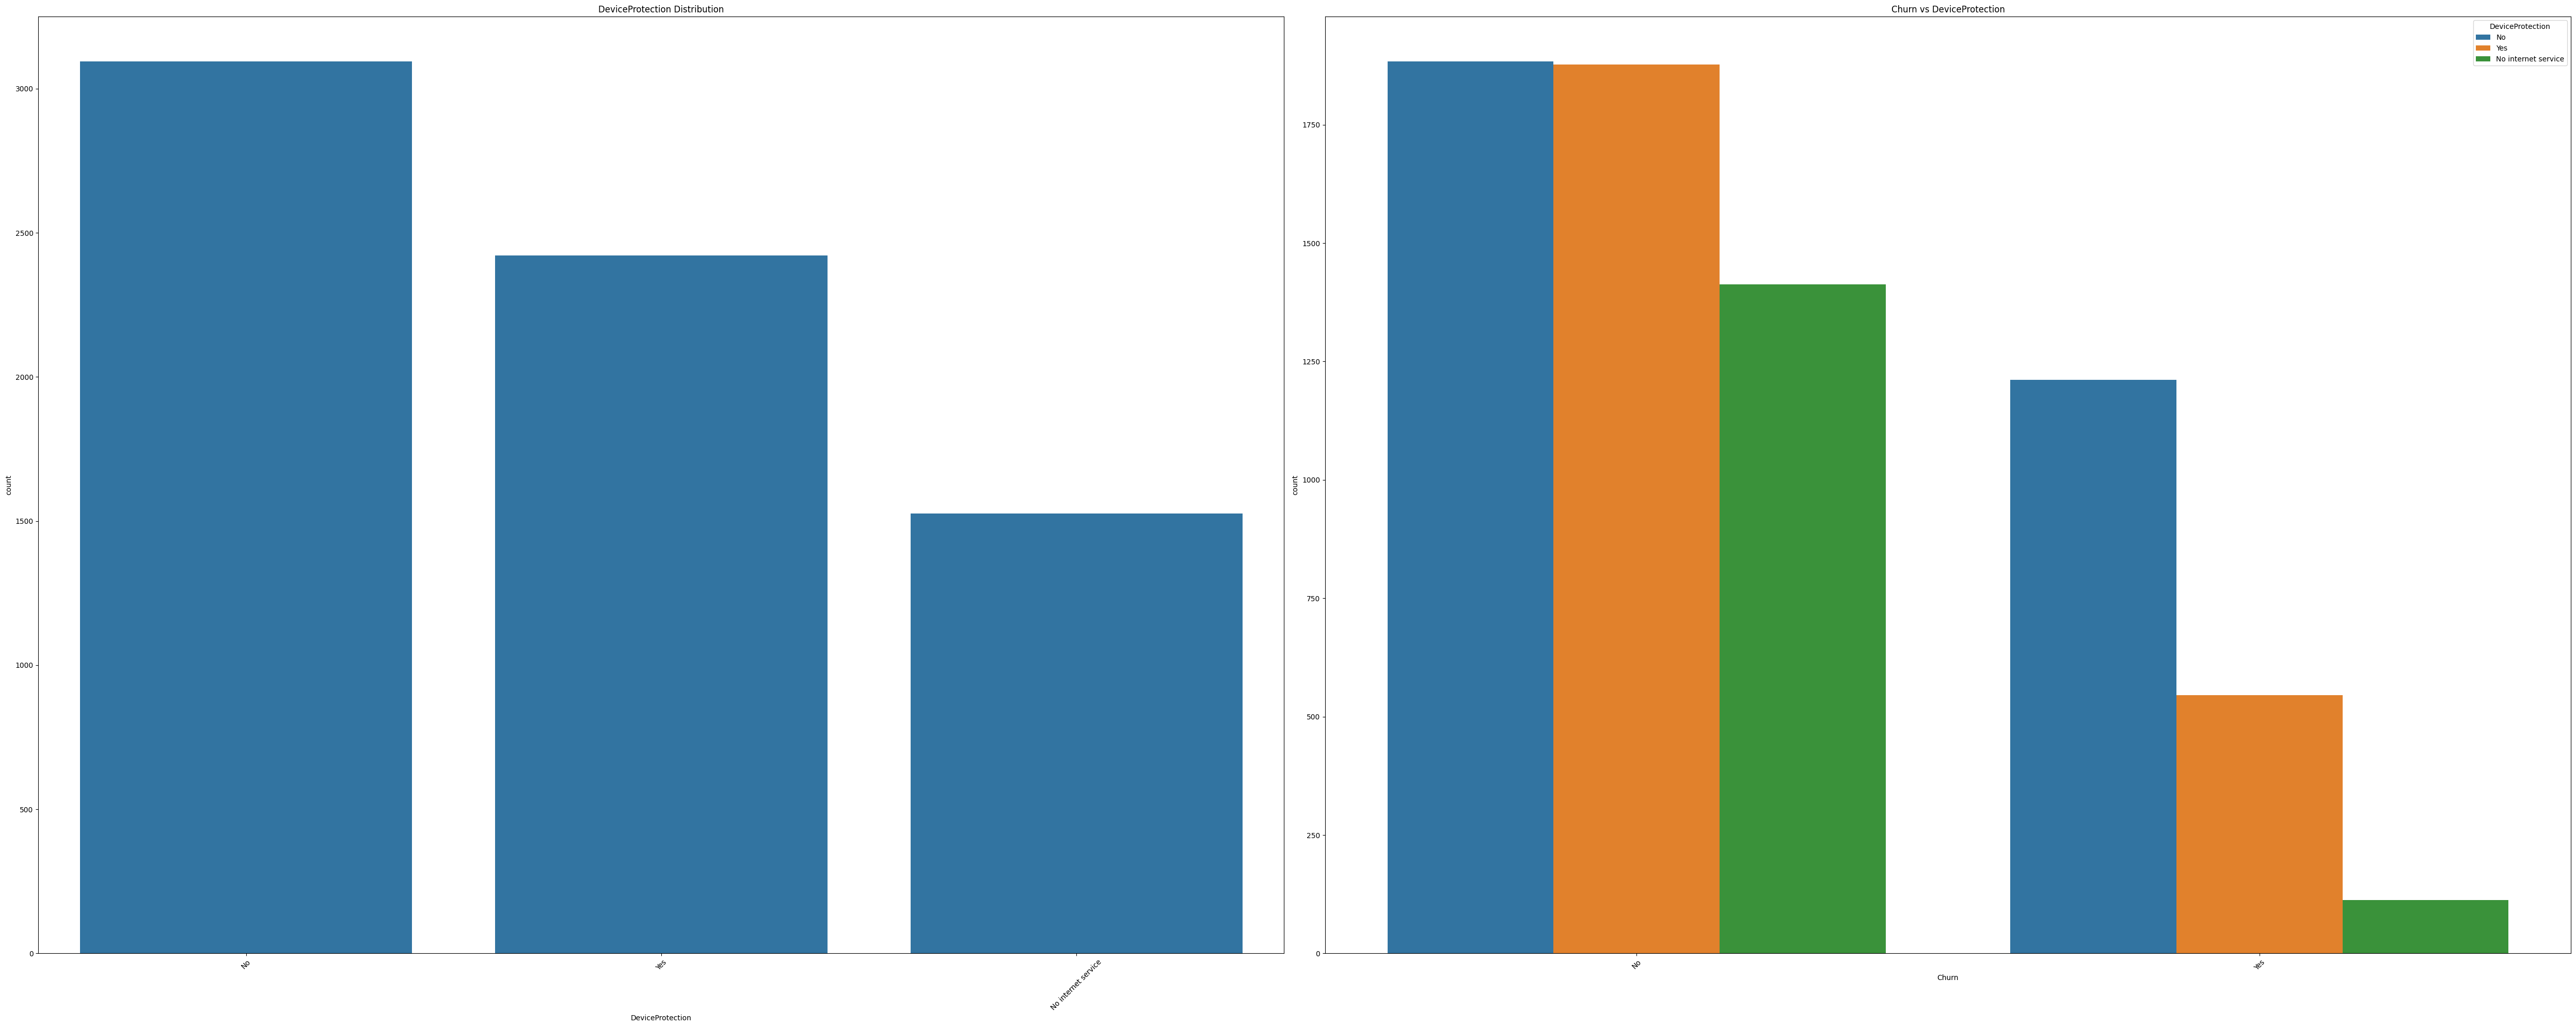

In [109]:
explore_feature_vs_target(data= data,feature='DeviceProtection')

Examining TechSupport vs Churn
Examining the Distribution of TechSupport
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
Percentage TechSupport
TechSupport
No                     49.311373
Yes                    29.021724
No internet service    21.666903
Name: proportion, dtype: float64

TechSupport vs Churn Cross-tab:
Churn                  No   Yes
TechSupport                    
No                   2027  1446
No internet service  1413   113
Yes                  1734   310


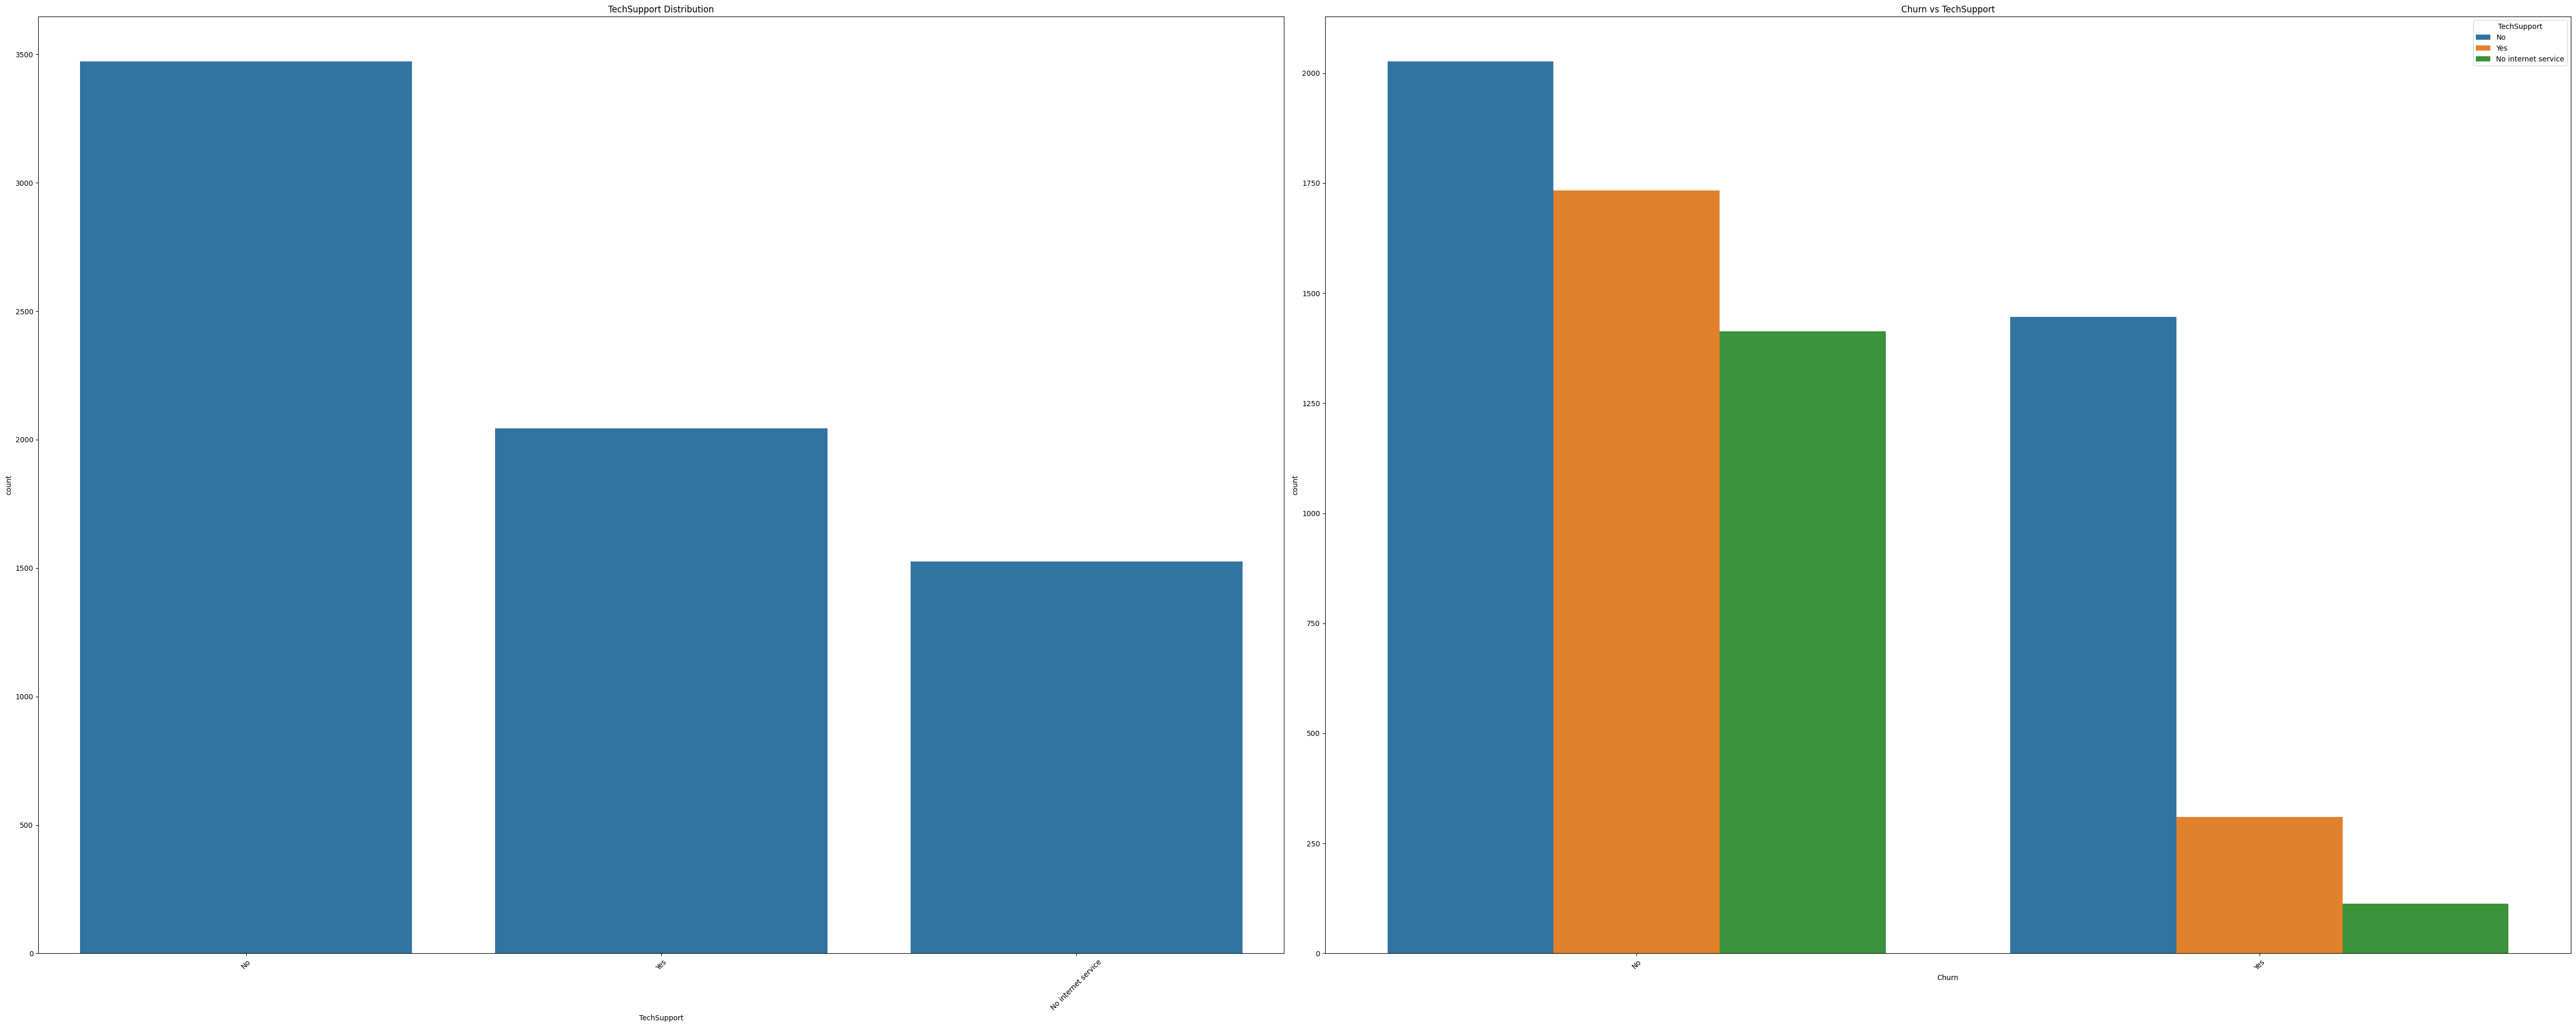

In [110]:
explore_feature_vs_target(data= data,feature='TechSupport')

Examining StreamingTV vs Churn
Examining the Distribution of StreamingTV
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64
Percentage StreamingTV
StreamingTV
No                     39.897771
Yes                    38.435326
No internet service    21.666903
Name: proportion, dtype: float64

StreamingTV vs Churn Cross-tab:
Churn                  No  Yes
StreamingTV                   
No                   1868  942
No internet service  1413  113
Yes                  1893  814


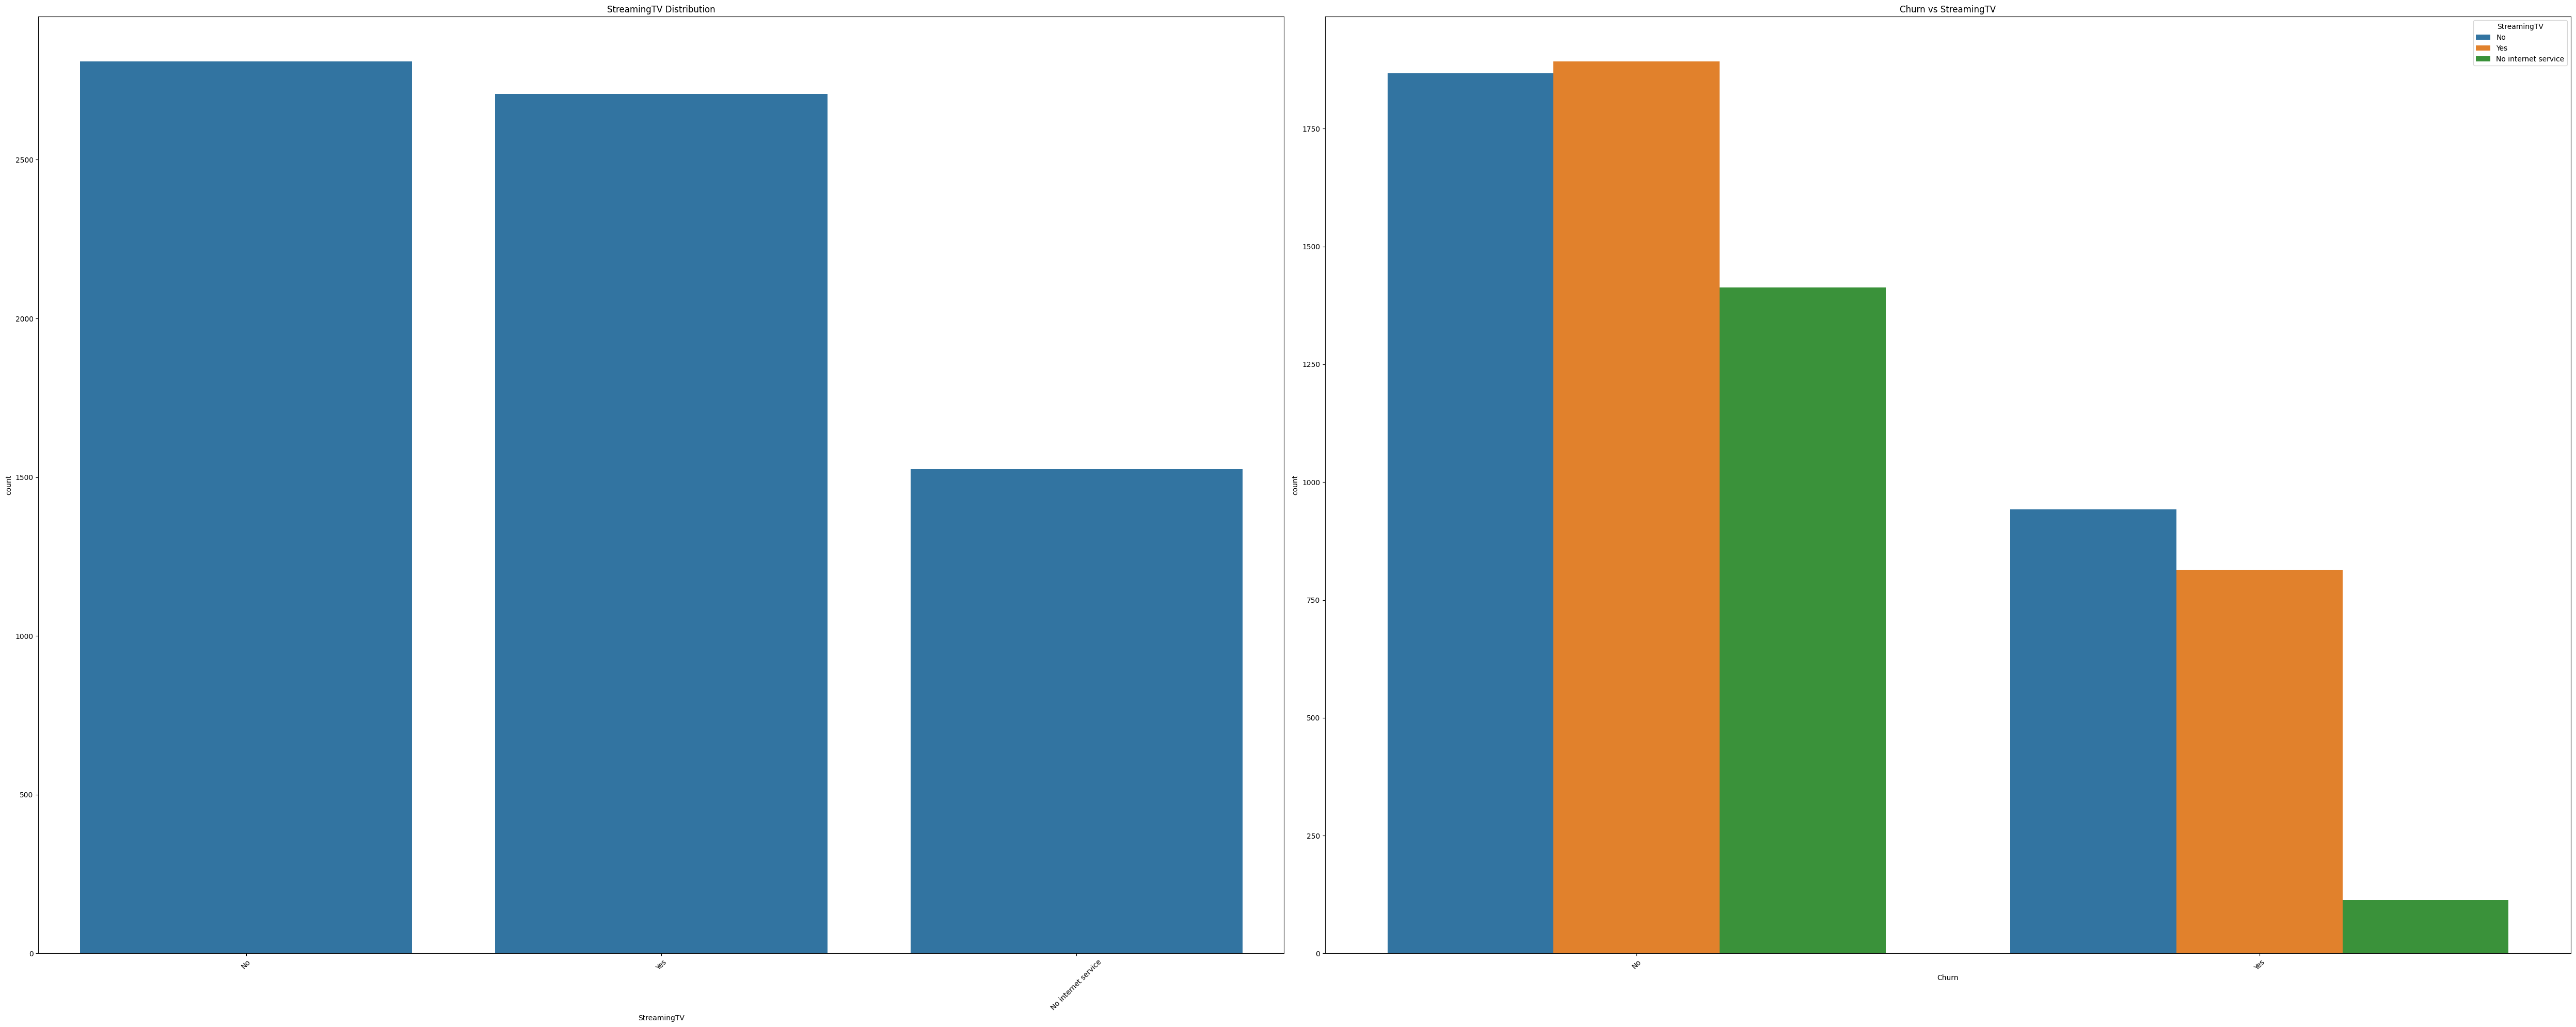

In [111]:
explore_feature_vs_target(data= data,feature='StreamingTV')

Examining StreamingMovies vs Churn
Examining the Distribution of StreamingMovies
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64
Percentage StreamingMovies
StreamingMovies
No                     39.542808
Yes                    38.790288
No internet service    21.666903
Name: proportion, dtype: float64

StreamingMovies vs Churn Cross-tab:
Churn                  No  Yes
StreamingMovies               
No                   1847  938
No internet service  1413  113
Yes                  1914  818


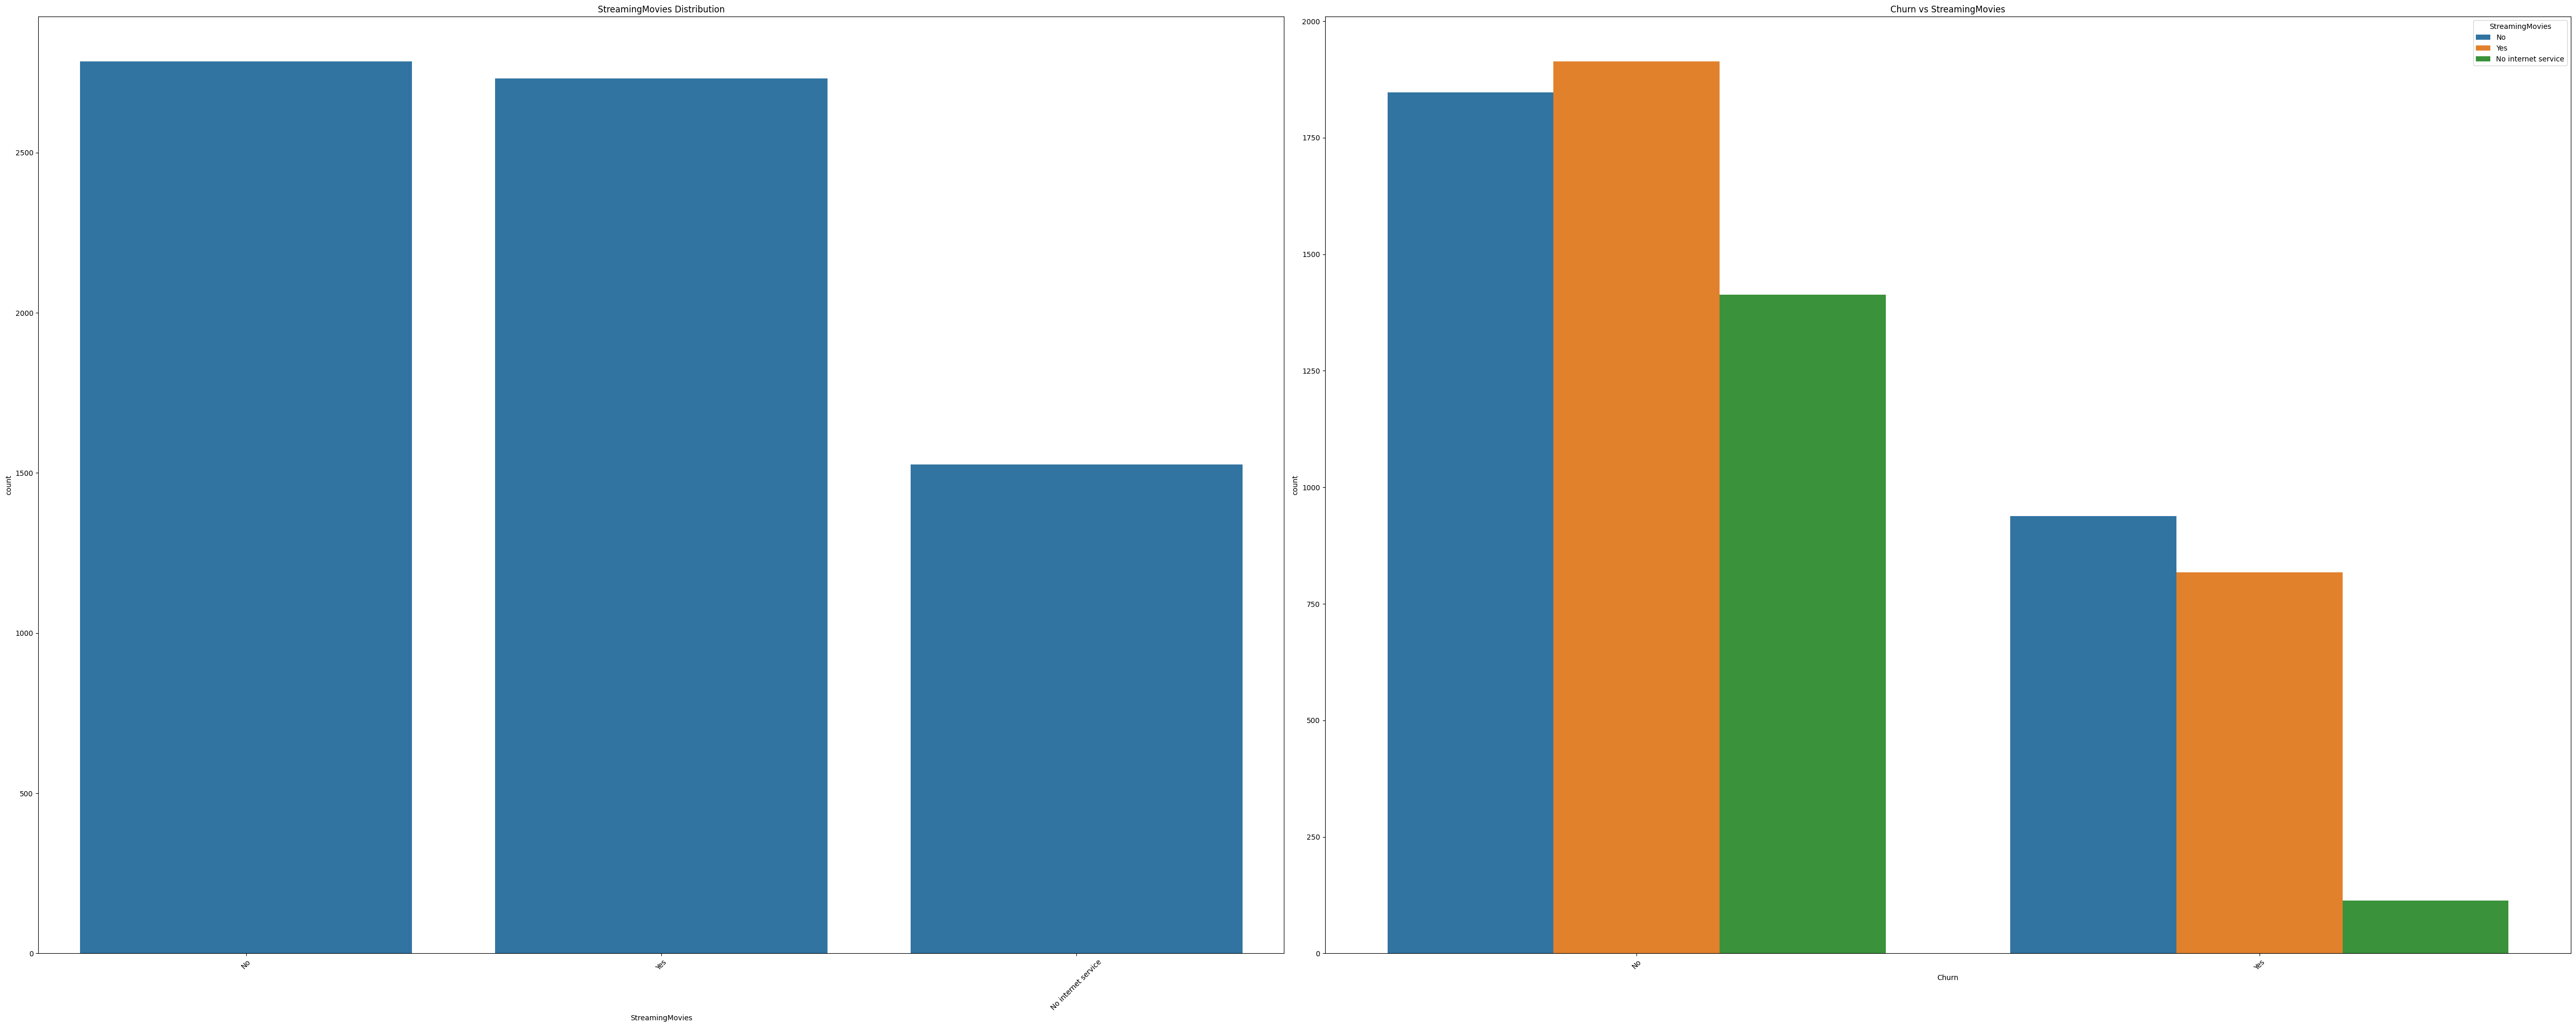

In [112]:
explore_feature_vs_target(data= data,feature='StreamingMovies')

Examining Contract vs Churn
Examining the Distribution of Contract
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
Percentage Contract
Contract
Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: proportion, dtype: float64

Contract vs Churn Cross-tab:
Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48


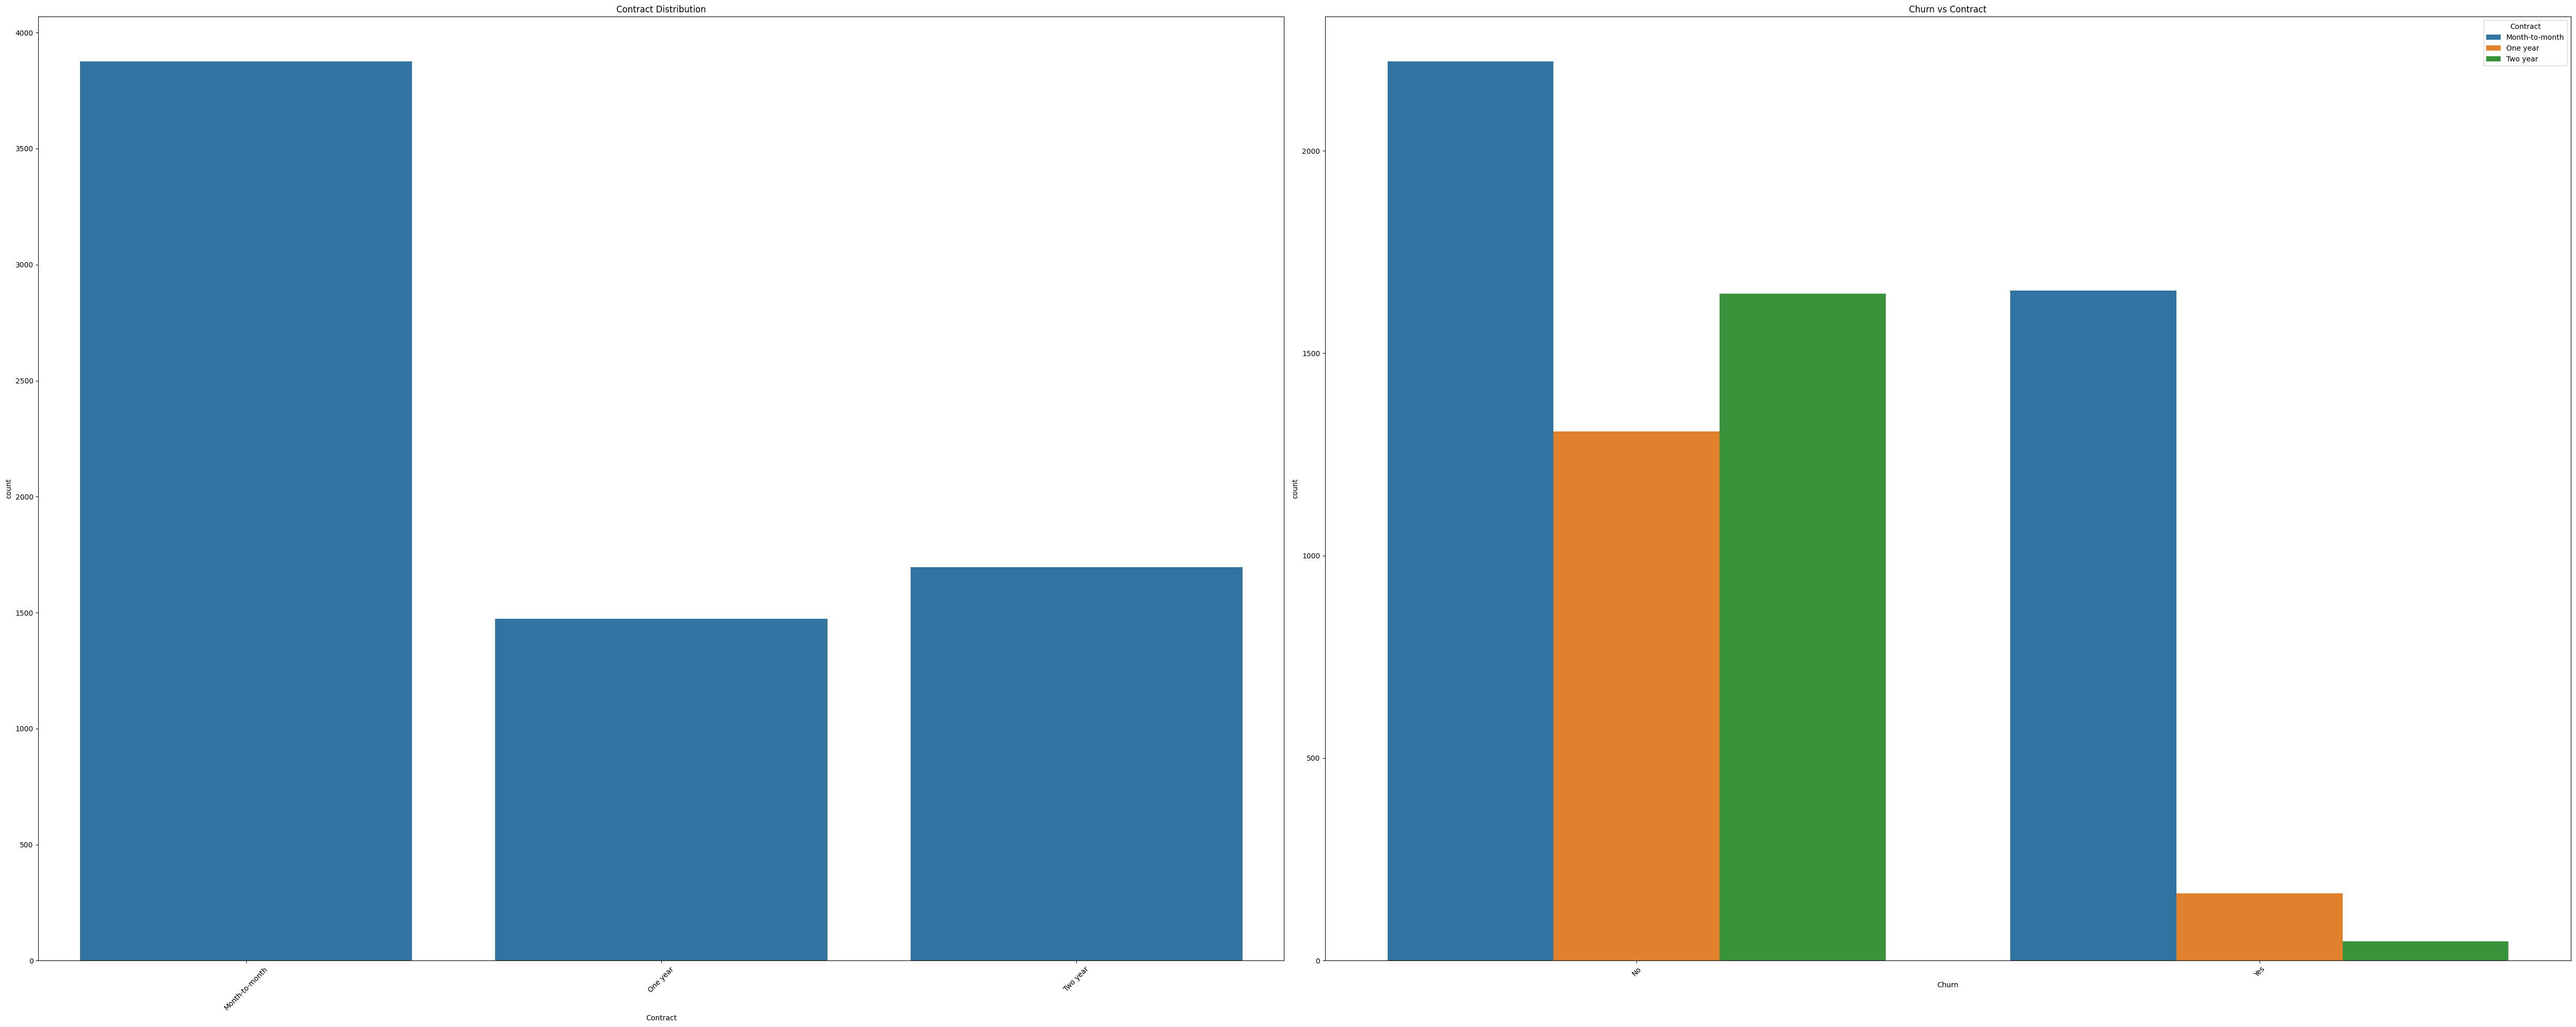

In [113]:
explore_feature_vs_target(data= data,feature='Contract')

Examining PaperlessBilling vs Churn
Examining the Distribution of PaperlessBilling
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64
Percentage PaperlessBilling
PaperlessBilling
Yes    59.221922
No     40.778078
Name: proportion, dtype: float64

PaperlessBilling vs Churn Cross-tab:
Churn               No   Yes
PaperlessBilling            
No                2403   469
Yes               2771  1400


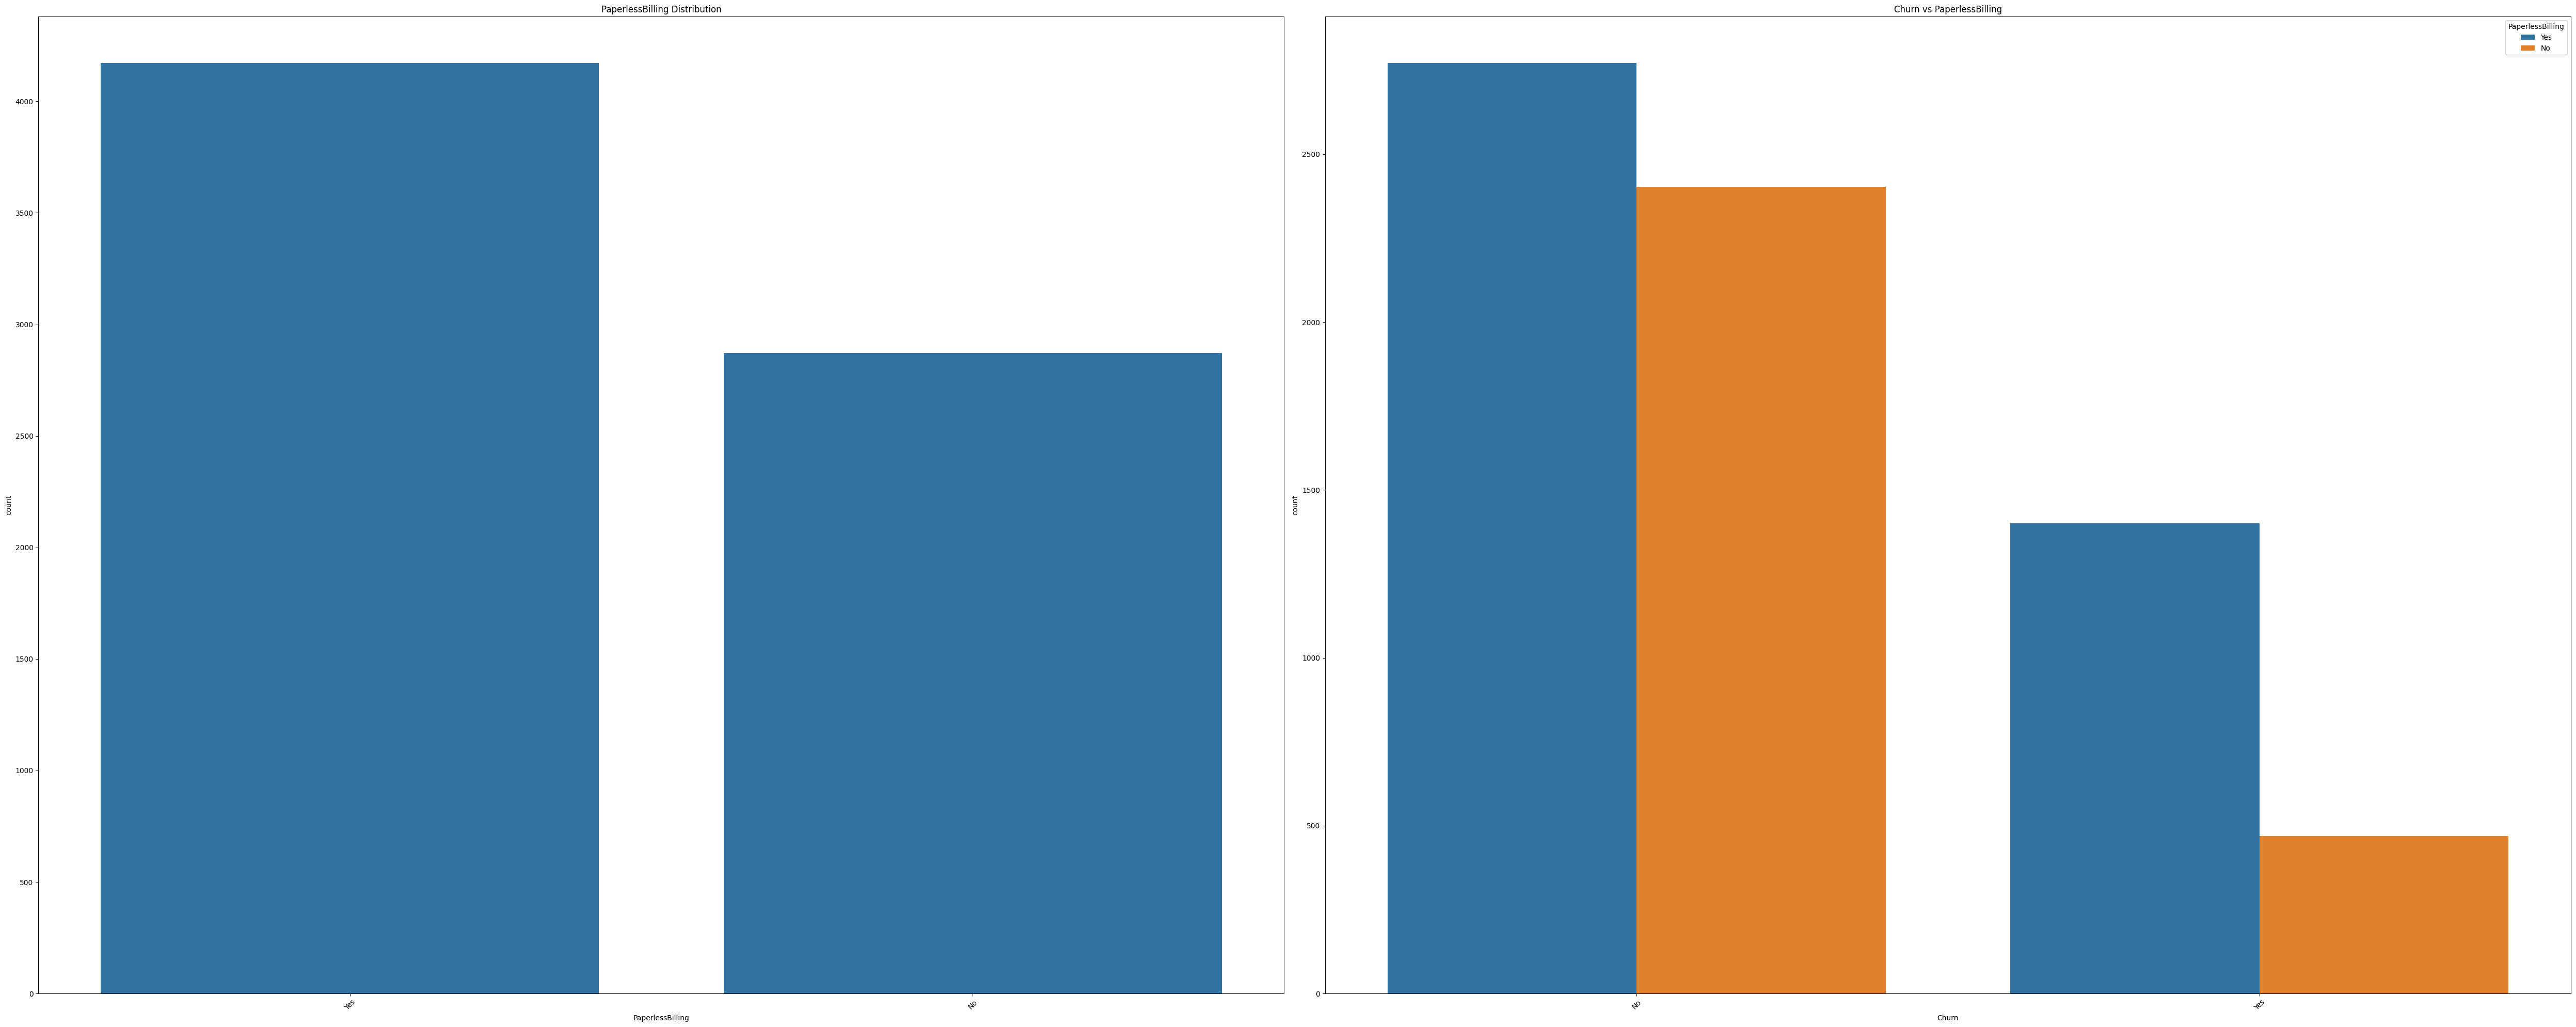

In [114]:
explore_feature_vs_target(data= data,feature='PaperlessBilling')

Examining PaymentMethod vs Churn
Examining the Distribution of PaymentMethod
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64
Percentage PaymentMethod
PaymentMethod
Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: proportion, dtype: float64

PaymentMethod vs Churn Cross-tab:
Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308


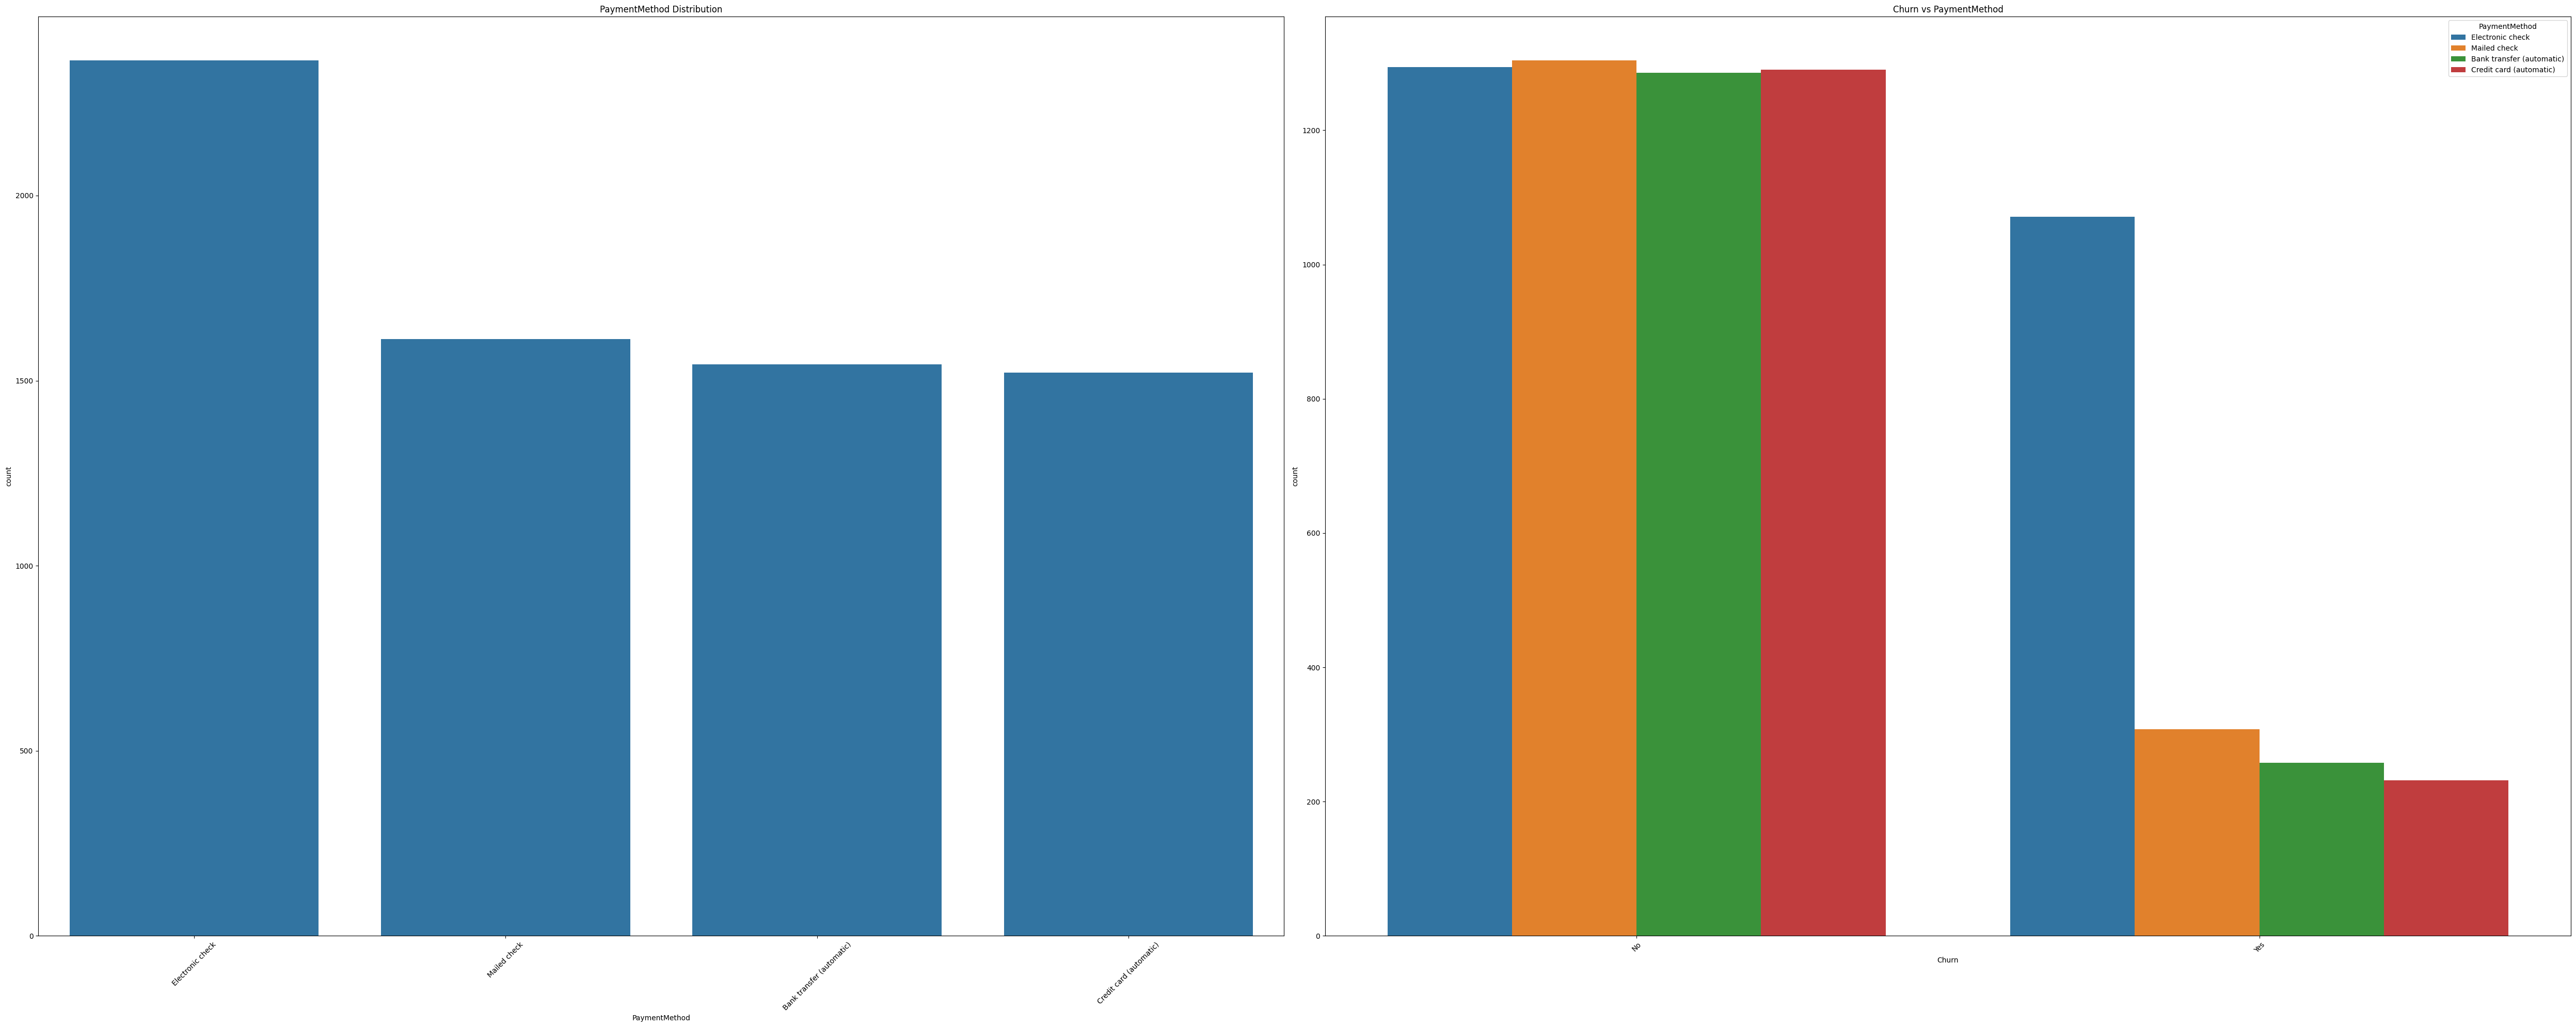

In [115]:
explore_feature_vs_target(data= data,feature='PaymentMethod')

<Axes: xlabel='tenure', ylabel='Count'>

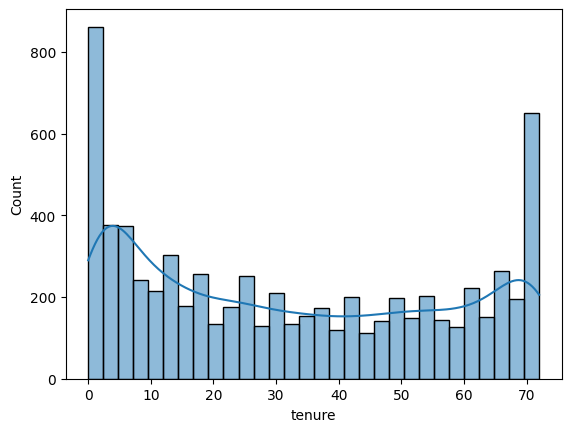

In [116]:
sns.histplot(data['tenure'], bins=30, kde=True)



<Axes: xlabel='tenure', ylabel='Count'>

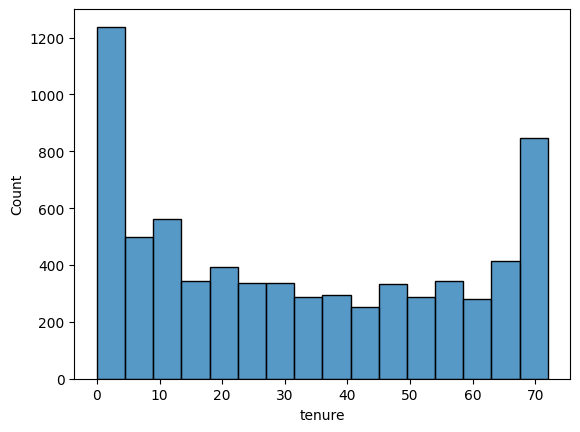

In [117]:
sns.histplot(data= data, x = "tenure")

<Axes: xlabel='tenure', ylabel='Count'>

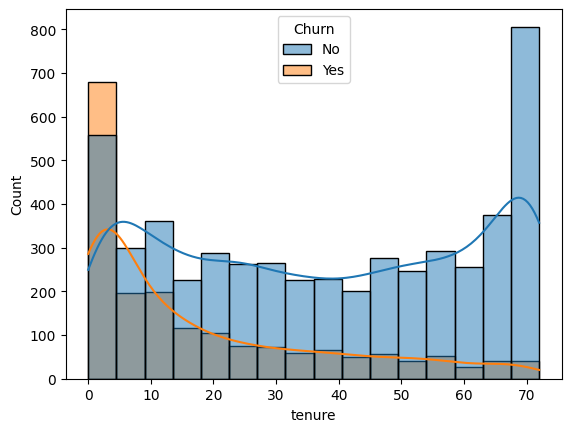

In [118]:
sns.histplot(data=data, x = "tenure",kde=True, hue = "Churn" )

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

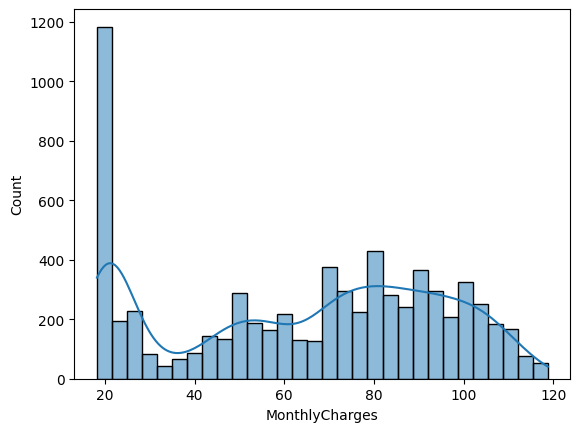

In [119]:
sns.histplot(data['MonthlyCharges'], bins=30, kde=True) 


<Axes: xlabel='TotalCharges', ylabel='Count'>

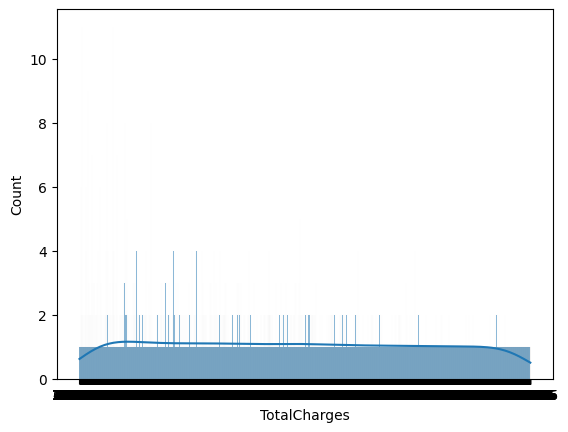

In [120]:
sns.histplot(data['TotalCharges'], bins=30, kde=True) 



<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

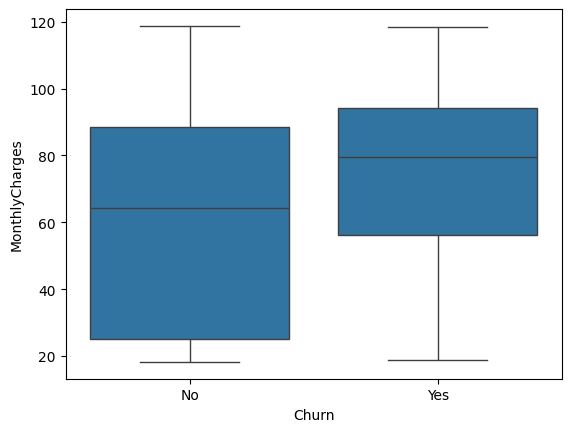

In [121]:
sns.boxplot(x= "Churn",y='MonthlyCharges',data=data)

<Axes: xlabel='Churn', ylabel='TotalCharges'>

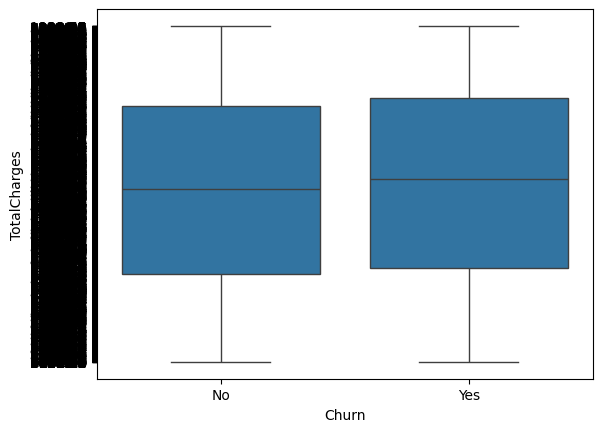

In [122]:
sns.boxplot(x= "Churn",y='TotalCharges',data=data)

In [123]:
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Data Cleaning & Type Conversion
Issue Identified:
The TotalCharges column was stored as string data type instead of numeric, containing 'NaN' string values instead of proper null values.

In [133]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
print("Missing values in TotalCharges:",data['TotalCharges'].isnull().sum())
print(data['TotalCharges'].info())

print(data.isnull().sum())


Missing values in TotalCharges: 11
<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB
None
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


Impact:

Successfully converted data type from object/string to float64
Identified 11 missing values (0.16% of total data)
Enabled proper numerical analysis and calculations on the TotalCharges column

Next Steps:

Analyze the pattern of missing values
Decide on appropriate imputation strategy (mean, median, or removal)
Verify data integrity after cleaning